# Assignment – Module 771766: Fundamentals of Data Science
## Census Project
### Student ID - 202403820 | Samuel Datubo Jaja

## Aim: Data Cleaning & Analysis for the UK Government on Land Development and Investment 

# Data Cleaning Workflow for Census Data:

The data cleaning process involved several systematic steps to ensure the dataset was ready for analysis. Initially, the dataset was loaded using pandas and inspected with commands like head(), info(), and describe() to understand its structure and basic statistics. Missing values were identified using isnull().sum() and handled appropriately. Data type conversions ensured that columns had suitable data types, such as integers for Age and House Number. Unnecessary columns were either removed or renamed for clarity. Duplicate records were also checked for, and outliers were addressed. Categorical data were standardized for consistency. Finally, the cleaned data was saved to a new CSV file for further analysis.

In [1]:
#importng python libraries for data cleaning and analysis  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#path to original census data 
census_data_file_path = "census0.csv"

#loading original census data for cleaning and early analysis with pandas
original_census_df = pd.read_csv(census_data_file_path)

#making a copy of original  census data to ensure data integrity 
census_df = original_census_df.copy()

In [3]:
#displaying the first five and last five records of census data with pandas to ensure it was properly read/loaded.
census_df

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1.0,Williams Lane,Garry,Fleming,28,Head,Married,Male,Film/video editor,NaN,Agnostic
1,1,1.0,Williams Lane,Nicola,Fleming,26,Wife,Married,Female,Glass blower/designer,NaN,NaN
2,2,2.0,Williams Lane,Max,Davies,65,Head,Married,Male,Advertising copywriter,NaN,Christian
3,3,2.0,Williams Lane,Donna,Davies,60,Wife,Married,Female,Clinical cytogeneticist,NaN,Christian
4,4,3.0,Williams Lane,Howard,O'Donnell,43,Head,Married,Male,Occupational therapist,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
10452,10452,1.0,Brass Barracks,Guy,Bryan,33,Son,Single,Male,Training and development officer,NaN,Christian
10453,10453,1.0,Brass Barracks,Benjamin,Bryan,31,Son,Single,Male,"Librarian, public",NaN,Christian
10454,10454,1.0,Brass Barracks,Emily,Bryan,9,Daughter,NaN,Female,Student,NaN,NaN
10455,10455,1.0,Aberdeen Ranch,Caroline,Miller,58,Head,Married,Female,"Horticulturist, commercial",NaN,NaN


In [4]:
#sumarry statistics of census data-frame, from this I can infer missing values in my dataset(census data) based on Non-Null Count
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10457 entries, 0 to 10456
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10457 non-null  int64  
 1   House Number                   10405 non-null  float64
 2   Street                         10405 non-null  object 
 3   First Name                     10405 non-null  object 
 4   Surname                        10405 non-null  object 
 5   Age                            10405 non-null  object 
 6   Relationship to Head of House  9616 non-null   object 
 7   Marital Status                 7879 non-null   object 
 8   Gender                         10405 non-null  object 
 9   Occupation                     10405 non-null  object 
 10  Infirmity                      92 non-null     object 
 11  Religion                       4302 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usa

In [5]:
#before cleaning fetching the length of census_df, will use it to compute later.
range_index_before_cleaning = len(census_df)

In [6]:
#Identifying duplicate rows in census_df
duplicate_rows = census_df[census_df.duplicated()]

#printing duplicate rows
print("Duplicate rows")

#showeng the column headers if any duplicates
duplicate_rows

Duplicate rows


,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [9]:
#After duplicate rows were checked for, I also checked for empty strings
#check_empty_strings function definition
def check_empty_strings(census_df):
    """
    This function checks for empty strings in a DataFrame and returns the total number of empty strings found.
    # The double sum() function sums up the true values and then sums up the counts from all columns.
    
    Parameters:
    census_df (pd.DataFrame): The DataFrame to check for empty strings.

    Returns:
    int: The total number of empty strings in the DataFrame.
    """
    
    #checking for empty strings (or spaces)
    #applymap and map varies on pandas versions(works on mine with map but on DAIM system with applymap),
    #it is used to apply a functionality over and iterable eg a list
    empty_strings = census_df.applymap(lambda x: x == ' ')
    
    #get the number of empty strings in the DataFrame and print it.
    #the double sum() function, sum up the true values, and sum up the counts from all columns.
    num_empty_strings = empty_strings.sum().sum()
    print(f'Total empty strings in DataFrame: {num_empty_strings}')
    
    return num_empty_strings


In [10]:
#check_empty_strings function call/invocation
total_empty_strings_initial = check_empty_strings(census_df)


Total empty strings in DataFrame: 22


In [11]:
#replace empty strings with NaN with inplace set to true so that after the operation,
#there will be  no need to assign the result to a  new variable. 
census_df.replace(' ', np.nan, inplace=True)

In [12]:
#A confirmation check for empty strings, using the earlier check_empty_strings custom-made defined function
total_empty_strings_final_1 = check_empty_strings(census_df)

Total empty strings in DataFrame: 0


In [13]:
#check_missing_values function definition
def check_missing_values(census_df):
    """
    This function checks for missing values in each column of a DataFrame and returns a DataFrame 
    with the count and percentage of missing values.
    
    # This function serves as a guide to knowing the percentage of missing values in the dataset.
    
    Parameters:
    census_df (pd.DataFrame): The DataFrame to check for missing values.

    Returns:
    pd.DataFrame: A DataFrame showing the number of missing values and their percentages for each column.
    """
    
    #checking for missing values in each column
    missing_values = census_df.isnull().sum()
    
    #calculating percentage of missing values for each column
    missing_percentage = (missing_values / len(census_df)) * 100
    
    #display missing values and their percentages for the dataset as missing data
    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    return missing_data

In [14]:
#check_missing_values function call
missing_data_initial = check_missing_values(census_df)
#data frame display for percentage missing values 
missing_data_initial

,Missing Values,Percentage
Unnamed: 0,0,0.000000
House Number,52,0.497275
Street,52,0.497275
First Name,52,0.497275
Surname,52,0.497275
Age,53,0.506838
Relationship to Head of House,843,8.061586
Marital Status,2578,24.653342
Gender,52,0.497275
Occupation,54,0.516400


In [15]:
#summation of null/na values/column
census_df.isna().sum()

Unnamed: 0                           0
House Number                        52
Street                              52
First Name                          52
Surname                             52
Age                                 53
Relationship to Head of House      843
Marital Status                    2578
Gender                              52
Occupation                          54
Infirmity                        10377
Religion                          6160
dtype: int64

## Check-List Observations 
 
1. The column called unnamed: 0 should be serial number s/n which is more descriptive or dropped
2. House number should not be continuous but discrete [int and not float]
3. Age should be int and not float and  has  missing values which will be attended to.
4. Street, First Name, Surname have missing NaNs.
5. Marital Status, Relationship to Head of House, Gender, Occupation, Infirmity, and Religion all have NaNs that need careful attention.
6. Data type corrections.  

## Census Data Individual Field/Column Cleaning Starts Here 

## Cleaning/Investigating "Unnamed: 0" Column Header 
There could be two options for the "Unnamed: 0" Column/Feature can be a redundant index or it is useful for tracking rows or debugging. 

In [16]:
#getting unique values in series
census_df['Unnamed: 0'].unique()

array([    0,     1,     2, ..., 10454, 10455, 10456], dtype=int64)

In [17]:
#checking if Unnamed: 0 is a sequential index
if (census_df['Unnamed: 0'] == range(1, len(census_df) + 1)).all():
    #the column is a redundant index, drop it
    census_df.drop(columns=['Unnamed: 0'], inplace=True)
else:
    #the column might be useful, I will rename it.
    census_df.rename(columns={'Unnamed: 0': 'Serial Number'}, inplace=True)

#verifying the changes I made.
(census_df.head())


,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1.0,Williams Lane,Garry,Fleming,28,Head,Married,Male,Film/video editor,NaN,Agnostic
1,1,1.0,Williams Lane,Nicola,Fleming,26,Wife,Married,Female,Glass blower/designer,NaN,NaN
2,2,2.0,Williams Lane,Max,Davies,65,Head,Married,Male,Advertising copywriter,NaN,Christian
3,3,2.0,Williams Lane,Donna,Davies,60,Wife,Married,Female,Clinical cytogeneticist,NaN,Christian
4,4,3.0,Williams Lane,Howard,O'Donnell,43,Head,Married,Male,Occupational therapist,NaN,Christian


## NOTE: 
The logical reasoning behind the order in which NaNs (Not a Number) in 'Street' and 'House Number' is based on the dependency and hierarchical nature of the data. A house number must belong to a street. So NaNs in the Street column will be filled first before those in House Number.
Also, the flow or oder of execution matters in data cleaning because following a logical order preserves data integrity.

## Cleaning Street  Feature 
If they have the same house number and surname then there is a great probability/likelihood that they  stay on the same street.

In [18]:
#checking for na or NaNs in Street series/column/field.
census_df[census_df['Street'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
701,701,4.0,NaN,Robin,Powell,52,Husband,Married,Male,Broadcast presenter,NaN,NaN
770,770,14.0,NaN,Anthony,Jones,74,Head,Widowed,Male,Retired Marketing executive,NaN,NaN
917,917,22.0,NaN,Clifford,Atkins-Vaughan,70,Husband,Married,Male,Retired Community arts worker,NaN,NaN
964,964,7.0,NaN,Tony,Pearce,40,Son,Single,Male,Financial trader,NaN,NaN
1100,1100,27.0,NaN,Helen,Brown,56,Partner,Single,Female,Editorial assistant,NaN,NaN
1270,1270,24.0,NaN,Jacqueline,McCarthy,51,Head,Married,F,Adult guidance worker,NaN,Methodist
1474,1474,2.0,NaN,Denis,Osborne,64,Head,Single,Male,Information systems manager,NaN,Christian
1647,1647,11.0,NaN,Sean,Short,39,Son,Divorced,Male,"Engineer, maintenance (IT)",NaN,Christian
1716,1716,11.0,NaN,Bruce,Kelly,34,Partner,Single,Male,Unemployed,NaN,Methodist
1765,1765,13.0,NaN,Rhys,Wade,29,Son,NaN,Male,"Scientist, forensic",NaN,Christian


In [19]:
#If an individual(s) has/have the same house number and surname then they have a very high likelihood  of staying on the same street, 
#this strategy can be used to replace NaNs in the Street Column. A similar approach was used to fill House Number and Surname.

#function(fill_street) to fill NaN values in street based on House Number and Surname
def fill_street(df):
    #Group by House Number and Surname, then forward and backward fill NaNs in Street 
    #ensuring  that missing values are filled from both directions of the series
    df['Street'] = df.groupby(['House Number', 'Surname'])['Street'].ffill().bfill()
    
    #drop rows where Street is still NaN after forward and backward filling
    rows_before = df.shape[0] #using shape function to get number of rows
    df.dropna(subset=['Street'], inplace=True)
    rows_after = df.shape[0]
    
    #printing number of rows filled and dropped for data integrity check
    print(f"Rows before filling: {rows_before}")
    print(f"Rows after filling: {rows_after}")
    print(f"Rows dropped: {rows_before - rows_after}")
    return df

#invoking fill_street function but calling copy on census_df to avoid unintended side effects and maintain data integrity.
census_df = fill_street(census_df.copy())

#Street verification check for NaNs
census_df[census_df['Street'].isna()]

Rows before filling: 10457
Rows after filling: 10457
Rows dropped: 0


,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## Cleaning House Number 

In [20]:
#accessing unique values of House Number series 
census_df['House Number'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        nan,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [21]:
#checking for NaNs in House Number series/column
census_df[census_df['House Number'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
390,390,NaN,Bassenthwaite Motorway,Eleanor,Atkinson,40,Head,Married,Female,Magazine features editor,NaN,Christian
548,548,NaN,Marsh Bypass,Christine,Hall,14,Daughter,NaN,Female,Student,NaN,NaN
617,617,NaN,Marsh Bypass,Melanie,Ryan,48,Head,Single,Female,Interior and spatial designer,NaN,Christian
735,735,NaN,Phillips Alley,Guy,Atkinson,51,Head,Married,Male,"Designer, ceramics/pottery",NaN,Christian
881,881,NaN,Norris Shores,Harry,Chambers,67,Husband,Married,Male,Chartered public finance accountant,NaN,NaN
940,940,NaN,Norris Shores,Paige,Hill,37,Head,Divorced,Female,Unemployed,NaN,Christian
1412,1412,NaN,Mistletoe Crescent,Stephanie,Fox,54,Lodger,Single,Female,Medical secretary,NaN,Christian
1441,1441,NaN,Mistletoe Crescent,Charlotte,Cook,29,Daughter,Single,Female,Clinical cytogeneticist,NaN,Catholic
1573,1573,NaN,Butterfly Street,Amanda,Austin,19,NaN,Single,Female,University Student,NaN,NaN
1724,1724,NaN,Davies Island,Keith,Davis,30,Son,Single,Male,Mudlogger,NaN,Christian


After inspecting the unique values of house numbers in the dataset, it should be an integer and not float. Use the strategy if an individual has the same street and same surname then there is a possibility of having the same house number else drop that row.

In [22]:
#After viewing the unique values of house numbers in the dataset, it should be integer and not float since they are all numerical data
#Using the strategy if an individual has the same Street and same Surname then there is a possibility of having the same house number else drop that row
#Dropping wows ensures only the most reliable data is kept, but may result in data loss.
#Filling with mode will retain more data but may introduce inaccuracies.
#I will trade data reliability over introducing inaccuracies to aid good analysis.

#convert House Number to numeric, handling errors and convert from float to integer
def fill_house_number(df):
    #convert House Number to numeric, handling errors and convert from float to integer
    df['House Number'] = pd.to_numeric(df['House Number'], errors='coerce')
    
    #Group by Street and Surname, then forward and backward fill NaNs in House Number ensuring  that missing values are filled from both directions of the series
    df['House Number'] = df.groupby(['Street', 'Surname'])['House Number'].ffill().bfill()
    
    rows_before = df.shape[0]#getting row count
    df.dropna(subset=['House Number'], inplace=True)
    rows_after = df.shape[0]

    #ensuring type is integer 
    df['House Number'] = df['House Number'].astype(np.int64)
    
    #printing for data integrity checks 
    print(f"Rows before filling 'House Number': {rows_before}")
    print(f"Rows after filling 'House Number': {rows_after}")
    print(f"Rows dropped: {rows_before - rows_after}")
    return df
    
#applying fill_house_number function to census_df and ensuring that operations on Street and House Number do not interfere with Surname.
#calling copy on census_df to avoid unintended side effects and maintain data integrity.
census_df = fill_house_number(census_df.copy())

#House Number verification check for NaNs
census_df[census_df['House Number'].isna()]

Rows before filling 'House Number': 10457
Rows after filling 'House Number': 10457
Rows dropped: 0


,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## Cleaning First Name

In [23]:
#checking for NaNs in First Name series/column
census_df[census_df['First Name'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
90,90,38,Williams Lane,NaN,Vaughan,32,Head,Married,Female,Unemployed,NaN,Muslim
193,193,33,Spider Street,NaN,Walker,83,Head,Widowed,Male,Retired Geophysicist/field seismologist,NaN,Christian
261,261,4,Eagle Road,NaN,Reynolds,21,Head,Single,NaN,Unemployed,NaN,Christian
461,461,7,O'Brien Center,NaN,Benson,28,Husband,Married,Male,Intelligence analyst,NaN,NaN
762,762,9,Calendar Mountains,NaN,Davies,38,Son,Single,Male,Proofreader,NaN,NaN
899,899,18,Norris Shores,NaN,Cooke,62,Head,Married,f,Medical secretary,NaN,NaN
920,920,23,Norris Shores,NaN,Fox,22,Daughter,Divorced,Female,University Student,NaN,NaN
1155,1155,47,St.John Falls,NaN,Gould,43,Head,Divorced,Female,Unemployed,NaN,Methodist
1216,1216,8,Winchester Field,NaN,Hancock,61,Husband,Married,Male,Radio broadcast assistant,NaN,NaN
2383,2383,2,Brightwater Street,NaN,Henderson,30,Lodger,Widowed,Male,Race relations officer,NaN,NaN


In [24]:
#cleaning the First Name feature, the First Name column has 52 missing values out of 10,457 records, which is a relatively small proportion.
#based on its limited impact, I could consider either dropping the column or filling the missing values with Unknown.
#To maintain data integrity and avoid losing potentially valuable information in other columns, I choose to fill the missing values with Unknown.
#Further analysis, including machine learning algorithms, can be conducted to assess the impact of this feature/field.

#filling missing First Name with Unknown rather than dropping rows and losing data on other columns. 
census_df['First Name'] = census_df['First Name'].fillna('Unknown')

#verification check on First Name
census_df[census_df['First Name'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## Cleaning Surname Feature 
If they they have the same House Number fill else drop the surname

In [25]:
#checking for NaNs in Surname series/column
(census_df[census_df['Surname'].isna()])

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
33,33,14,Williams Lane,Aaron,NaN,44,Head,Single,Male,Television/film/video producer,NaN,Christian
254,254,1,Eagle Road,Neil,NaN,7,Son,NaN,Male,Student,NaN,NaN
275,275,8,Eagle Road,Jacob,NaN,26,Son,Divorced,Male,Fisheries officer,NaN,NaN
434,434,15,Bassenthwaite Motorway,Mark,NaN,74,Head,Married,Male,Retired Local government officer,NaN,Christian
549,549,4,Marsh Bypass,Keith,NaN,12,Son,NaN,Male,Student,NaN,NaN
642,642,41,Marsh Bypass,Jason,NaN,62,NaN,Single,Male,Health visitor,NaN,Christian
669,669,50,Marsh Bypass,Sylvia,NaN,38,Head,Single,Female,Chartered accountant,NaN,NaN
1064,1064,13,St.John Falls,Nicholas,NaN,39,NaN,Single,Male,"Surveyor, land/geomatics",NaN,Christian
1802,1802,12,Lloyd Avenue,Laura,NaN,60,Head,Single,Female,Energy manager,NaN,Christian
1838,1838,27,Lloyd Avenue,Barbara,NaN,46,Head,Married,Female,Futures trader,NaN,Christian


In [26]:
#if they have the same House Number and street, replace with surname else drop the surname
def fill_surname(df):
    #group by House Number and Street, then forward and backward  fill NaNs in 'Surname' #ensuring  that missing values are filled from both directions of the series
    df['Surname'] = df.groupby(['House Number', 'Street'])['Surname'].ffill().bfill()

    rows_before = df.shape[0] #get number of rows
    #drop rows where Surname is still NaN after forward and backward filling
    df.dropna(subset=['Surname'], inplace=True)
    rows_after = df.shape[0]

    #printing before, after, and Rows dropped
    print(f"Rows before filling 'Surname': {rows_before}")
    print(f"Rows after filling 'Surname': {rows_after}")
    print(f"Rows dropped: {rows_before - rows_after}")
    
    #returning dataframe
    return df
    
#applying fill_surname function to census_df and ensuring that operations on Street and House Number do not interfere with Surname.
#calling copy on census_df to avoid unintended side effects and maintain data integrity.
census_df = fill_surname(census_df.copy())

(census_df[census_df['Surname'].isna()])

Rows before filling 'Surname': 10457
Rows after filling 'Surname': 10457
Rows dropped: 0


,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## Cleaning Age Feature 

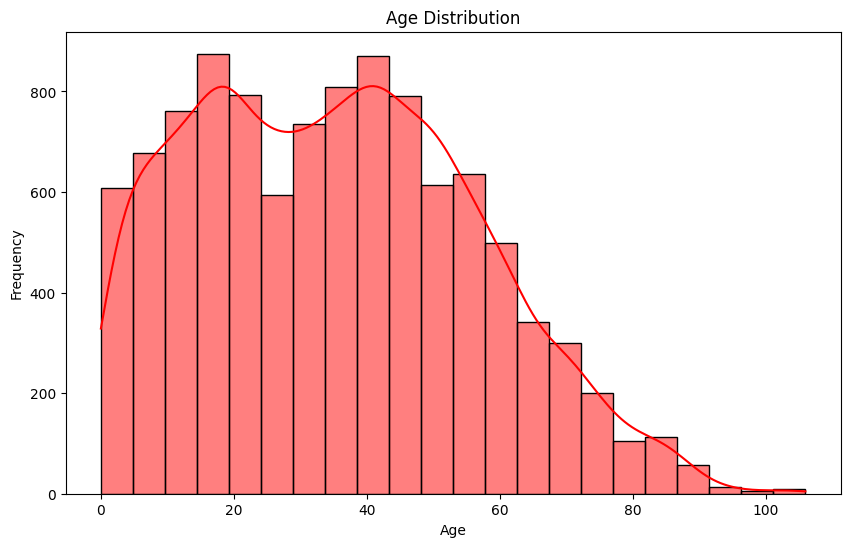

In [27]:
#Before filling in missing values with mean or median, I checked the distribution (Age series) 
#to know if the distribution is skewed, if skewed the median might be a better choice than filling up with the mean.

#converting 'Age' column to numeric and then forcing errors to NaN becuase the column/series contains some string values
census_df['Age'] = pd.to_numeric(census_df['Age'], errors='coerce')

#the bin width
bin_width = 5

#Calculating number of bins dynamically min and max functions
min_age = census_df['Age'].min()
max_age = census_df['Age'].max()
num_bins = int((max_age - min_age) / bin_width) + 1

#ploting distribution of the Age column to decide between mean or median for filling in missing values, using kernerl density.
plt.figure(figsize=(10, 6))
sns.histplot(census_df['Age'], bins=num_bins, kde=True, color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
#saving the plot 
plt.savefig('Age Distribution.png', format='png')
plt.show()

In [28]:
#checking for NaNs in age column
census_df[census_df['Age'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
128,128,6,Spider Street,Simon,Jones,NaN,Partner,Single,Male,Water engineer,NaN,NaN
150,150,15,Spider Street,Phillip,Bradshaw,NaN,Husband,Married,Male,Civil Service fast streamer,NaN,NaN
328,328,10,Davidson Lane,Josephine,Rogers,NaN,Head,Married,Female,"Engineer, communications",NaN,NaN
455,455,5,O'Brien Center,Jacqueline,Anderson-Stone,NaN,Granddaughter,Single,Female,University Student,NaN,Christian
520,520,21,O'Brien Center,Anthony,Lloyd,NaN,Son,Divorced,Male,Amenity horticulturist,Deaf,Christian
652,652,45,Marsh Bypass,Elaine,Clarke,NaN,Head,Married,Female,"Designer, fashion/clothing",NaN,Christian
719,719,9,Phillips Alley,Antony,Smith,NaN,Head,Widowed,Male,Retired Minerals surveyor,NaN,Christian
1477,1477,3,Butterfly Street,Norman,Riley,NaN,Husband,Married,Male,"Retired Engineer, materials",NaN,Christian
1640,1640,8,Inner Avenue,Kimberley,Heath,NaN,NaN,Single,Female,Emergency planning/management officer,NaN,NaN
1846,1846,29,Lloyd Avenue,Damien,Smart-French,NaN,Son,NaN,Male,Student,NaN,NaN


In [29]:
#inspecting Age unique values
census_df['Age'].unique()

array([ 28.        ,  26.        ,  65.        ,  60.        ,
        43.        ,  45.        ,  74.        ,  23.        ,
        51.        ,  18.        ,  34.        ,  35.        ,
        11.        ,   7.        ,   3.        ,  32.        ,
         0.        ,  40.        ,  57.        ,  88.        ,
        89.        ,  21.        ,  19.        ,  53.        ,
        49.        ,  14.        ,  78.        ,  44.        ,
        42.        ,  17.        ,  41.        ,  37.        ,
        36.        ,  38.        ,  10.        ,  64.        ,
        48.        ,  39.        ,  50.        ,  84.        ,
        86.        ,  47.        ,  29.        ,  30.        ,
         6.        ,  54.        ,  20.        ,  72.        ,
        77.        ,  73.        ,  56.        ,  24.        ,
        81.        ,  85.        ,  55.        ,   4.        ,
         8.        ,  25.        ,  70.        ,          nan,
        15.        ,  27.        ,  61.        ,  22.  

In [30]:
#At this point, The Age distribution is confirmed to be positively skewed, as seen in the histogram above.
#in such cases, the median is a better choice than the mean for imputing missing values,
#because it is less influenced by the few very high ages, ensuring a more accurate central tendency.
#Therefore, filling missing Age values with the median to maintain data integrity.

#getting age median
age_median = census_df['Age'].median()

#filling na in age with median and changing type to integer.
census_df['Age'] = census_df['Age'].fillna(age_median).astype(np.int64)

In [31]:
#recheking age column for NaNs
census_df[census_df['Age'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [32]:
#printing unique Age values after cleaning the age column
print(census_df['Age'].unique())

[ 28  26  65  60  43  45  74  23  51  18  34  35  11   7   3  32   0  40
  57  88  89  21  19  53  49  14  78  44  42  17  41  37  36  38  10  64
  48  39  50  84  86  47  29  30   6  54  20  72  77  73  56  24  81  85
  55   4   8  25  70  15  27  61  22  33  68  12  79  82  71  62  31  69
  93  83   1  80  58 103   5   2  16  52  46  59  13  63  87  66  67  75
   9  76  94  98 100 104 102  92  90  91  95  96 105 106]


In [33]:
#Checking to see if age is between the ages of 0 and 122 on the census data frame.
census_df = census_df[(census_df['Age'] >= 0) & (census_df['Age'] <= 122)]

#displaying census data
census_df

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Williams Lane,Garry,Fleming,28,Head,Married,Male,Film/video editor,NaN,Agnostic
1,1,1,Williams Lane,Nicola,Fleming,26,Wife,Married,Female,Glass blower/designer,NaN,NaN
2,2,2,Williams Lane,Max,Davies,65,Head,Married,Male,Advertising copywriter,NaN,Christian
3,3,2,Williams Lane,Donna,Davies,60,Wife,Married,Female,Clinical cytogeneticist,NaN,Christian
4,4,3,Williams Lane,Howard,O'Donnell,43,Head,Married,Male,Occupational therapist,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
10452,10452,1,Brass Barracks,Guy,Bryan,33,Son,Single,Male,Training and development officer,NaN,Christian
10453,10453,1,Brass Barracks,Benjamin,Bryan,31,Son,Single,Male,"Librarian, public",NaN,Christian
10454,10454,1,Brass Barracks,Emily,Bryan,9,Daughter,NaN,Female,Student,NaN,NaN
10455,10455,1,Aberdeen Ranch,Caroline,Miller,58,Head,Married,Female,"Horticulturist, commercial",NaN,NaN


In [34]:
#Checking to ensure that Age column has no nulls in there.
census_df.isnull().sum()

Serial Number                        0
House Number                         0
Street                               0
First Name                           0
Surname                              0
Age                                  0
Relationship to Head of House      843
Marital Status                    2578
Gender                              52
Occupation                          54
Infirmity                        10377
Religion                          6160
dtype: int64

## Cleaning Gender Column/Feature

In [35]:
#checking for nulls/na in Gender column
census_df[census_df['Gender'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
24,24,11,Williams Lane,Angela,Graham,51,Head,Married,NaN,Mechanical engineer,NaN,Christian
244,244,53,Spider Street,Shane,Norton,42,Head,Single,NaN,"Psychologist, sport and exercise",NaN,Methodist
261,261,4,Eagle Road,Unknown,Reynolds,21,Head,Single,NaN,Unemployed,NaN,Christian
543,543,2,Marsh Bypass,Ashleigh,Skinner,3,Daughter,NaN,NaN,Child,NaN,NaN
780,780,1,Rhubarb Street,Eileen,Bishop,58,Head,Married,NaN,Building control surveyor,NaN,Methodist
1011,1011,9,Charity Avenue,Kirsty,Lyons,33,Head,Divorced,NaN,"Geologist, wellsite",NaN,NaN
1174,1174,2,Green Avenue,Clifford,Thomas,49,Partner,Single,NaN,Tree surgeon,NaN,NaN
1265,1265,22,Winchester Field,Ashleigh,Robinson,37,Head,Married,NaN,Theatre manager,NaN,Methodist
1355,1355,47,Winchester Field,Sarah,Coates,47,Head,Married,NaN,Volunteer coordinator,NaN,Christian
1429,1429,27,Mistletoe Crescent,Caroline,Read,36,Wife,Married,NaN,Social researcher,NaN,NaN


In [36]:
#fetch the unique members of Relationship to Head of House
census_df['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Daughter', 'Son', 'Husband', 'Cousin', 'Lodger',
       'Partner', nan, 'Granddaughter', 'Grandson', 'Sibling', 'Visitor',
       'Step-Daughter', 'Niece', 'Adopted Daughter', 'Nephew',
       'Adopted Son', 'Step-Son'], dtype=object)

In [37]:
#the mapping dictionary (relationship_to_gender)
relationship_to_gender = {
    'Wife': 'Female',
    'Son': 'Male',
    'Adopted Son': 'Male',
    'Step-Son': 'Male',
    'Daughter': 'Female',
    'Adopted Daughter' : 'Female',
    'Step-Daughter': 'Female',
    'Nephew': 'Male',
    'Niece': 'Female',
    'Grandson': 'Male',
    'Granddaughter': 'Female',
    'Husband': 'Male'
}

#using map function to fill missing Gender values based on the relationship
census_df['Gender'] = census_df['Gender'].fillna(census_df['Relationship to Head of House'].map(relationship_to_gender))

#I am handling remaining missing values with caution, potentially considering the proportion of missing values
if census_df['Gender'].isna().mean() < 0.1:  #less than 10% missing
    #using the mode to fill the remaining missing values
    mode_gender = census_df['Gender'].mode()[0]
    census_df['Gender'] = census_df['Gender'].fillna(mode_gender) #passing teh mode to fillna
else:
    #if more than 10% are missing, mark them as 'Unknown'
    census_df['Gender'] = census_df['Gender'].fillna('Unknown')

#verifying the changes
census_df[census_df['Gender'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## Cleaning Relationship to Head of House Column/Feature

In [38]:
#checking for nulls/na in Relationship to Head of House column
census_df[census_df['Relationship to Head of House'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
71,71,30,Williams Lane,Jasmine,Davies,20,NaN,Single,Female,University Student,NaN,NaN
138,138,10,Spider Street,Louise,Hall,22,NaN,Single,Female,University Student,NaN,Christian
143,143,12,Spider Street,Sylvia,Davies,57,NaN,Single,female,Arts development officer,NaN,Christian
144,144,12,Spider Street,Danielle,Green,36,NaN,Single,female,"Lecturer, higher education",NaN,Christian
210,210,40,Spider Street,Elliott,Gill,32,NaN,Single,Male,English as a foreign language teacher,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
10416,10416,1,Derby Chalet,Amelia,Clarke,4,NaN,NaN,Female,Child,NaN,NaN
10418,10418,1,Hayward Manorhouse,Stuart,Hunt,39,NaN,Single,Male,"Engineer, chemical",NaN,NaN
10419,10419,1,Hayward Manorhouse,Fiona,Jones,24,NaN,Single,Female,Soil scientist,NaN,NaN
10420,10420,1,Hayward Manorhouse,Jacqueline,Taylor,20,NaN,Single,Female,Clinical psychologist,NaN,Christian


In [39]:
#Sice any age above 18 can be a head of the house but  a check has to be done to avoid multiple head of house, and below 18 can be considered a minor from the dataset, anything else can be labeled unknown
#function(fill_relationship_to_head) definition to fill Relationship to Head of House based on Age

def fill_relationship_to_head(row, df):
    if pd.isna(row['Relationship to Head of House']):
        if row['Age'] >= 18:
            #checking if there is already a head of house
            household = df[(df['House Number'] == row['House Number']) & (df['Surname'] == row['Surname'])]
            if 'Head' not in household['Relationship to Head of House'].values:
                return 'Head'
            else:
                return row['Relationship to Head of House']  #retaining/returning existing relationship
        elif row['Age'] < 18:
            return 'Minor'
        else:
            return 'Unknown'
    else:
        return row['Relationship to Head of House']

#applying the custom function to each row, that is why axis 
census_df['Relationship to Head of House'] = census_df.apply(lambda row: fill_relationship_to_head(row, census_df), axis=1)

#a fall back to ensure no NaNs are retained
census_df['Relationship to Head of House'] = census_df['Relationship to Head of House'].fillna('Unknown')

#Verify the changes
census_df[census_df['Relationship to Head of House'].isna()]


,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## Cleaning Religion Column/Feature

In [40]:
#converting the Religion column to string to ensure proper handling and replace NaN with Unknown
census_df['Religion'] = census_df['Religion'].fillna('Unknown').astype(str)

#get the count of each religion
religion_counts = census_df['Religion'].value_counts()

#define a threshold for low-frequency religions
threshold = 5 

#filter religions that have a frequency below the threshold
low_frequency_religions = religion_counts[religion_counts < threshold].index

#calculating the mode of the 'Religion' column
mode_religion = census_df['Religion'].mode()

#checking to know  if the mode is NaN
if mode_religion.empty or pd.isna(mode_religion[0]):
    replacement_value = 'Unknown'
else:
    replacement_value = mode_religion[0]

#replace the  low-frequency religions with the mode or Unknown
census_df['Religion'] = census_df['Religion'].apply(lambda x: replacement_value if x in low_frequency_religions else x)

#explicitly replacing any remaining NaN values with Unknown
census_df['Religion'] = census_df['Religion'].replace('nan', 'Unknown')

#verifying the changes
census_df[census_df['Religion'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [41]:
#FURTHER MORE: Any child (under age 18) and religion is marked as Unknown within a household(sharing the same surname and house number) will likely 
#inherit the religion of the Head of House. 

#assign_religion_from_head function definition
def assign_religion_from_head(df):
    #sorting by House Number, Surname, and Age to ensure ordering within households
    df = df.sort_values(by=['House Number', 'Surname', 'Age'])
    
    #grouping by House Number and Surname to process each household separately
    #propagate_religion function definition
    def propagate_religion(group):
        #finding the religion of the Head of House
        head_of_house_religion = group.loc[group['Relationship to Head of House'] == 'Head', 'Religion']
        
        #ensuring there is a single Head of House with a known religion
        if not head_of_house_religion.empty and head_of_house_religion.iloc[0] != 'Unknown':
            head_religion = head_of_house_religion.iloc[0]
            #assigning the head's religion to all Sons and Daughters under 18 with Unknown religion
            group.loc[(group['Relationship to Head of House'].isin(['Son', 'Daughter'])) & 
                      (group['Age'] < 18) & 
                      (group['Religion'] == 'Unknown'), 'Religion'] = head_religion
        return group
    
    # propagate_religion function invocation and reseting the index to avoid extra columns
    df = df.groupby(['House Number', 'Surname'], group_keys=False).apply(propagate_religion).reset_index(drop=True)
    
    return df

#assign_religion_from_head function invocation
census_df = assign_religion_from_head(census_df)

In [42]:
#verifying the changes (check for any remaining Unknown religions in children under 18)
under_18_unknowns = census_df[(census_df['Age'] < 18) & (census_df['Religion'] == 'Unknown')]

In [43]:
under_18_unknowns

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
34,4750,1,February Lodge,Justin,Barnes,9,Son,NaN,Male,Student,NaN,Unknown
35,4749,1,February Lodge,Ian,Barnes,13,Son,NaN,Male,Student,NaN,Unknown
36,4747,1,February Lodge,Shannon,Barnes,17,Daughter,NaN,Female,Student,NaN,Unknown
37,4748,1,February Lodge,Ashleigh,Barnes,17,Daughter,NaN,Female,Student,NaN,Unknown
61,10454,1,Brass Barracks,Emily,Bryan,9,Daughter,NaN,Female,Student,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
10420,6552,228,Strawberry Lights,Rhys,Wright-Price,16,Son,NaN,Male,Student,NaN,Unknown
10432,6566,231,Strawberry Lights,Harriet,Booth,2,Daughter,NaN,Female,Child,NaN,Unknown
10433,6565,231,Strawberry Lights,Karen,Booth,3,Daughter,NaN,Female,Child,NaN,Unknown
10436,6568,232,Strawberry Lights,Adrian,Bell,7,Grandson,NaN,M,Student,NaN,Unknown


## Ploting frequency of different religions and low-frequency religions

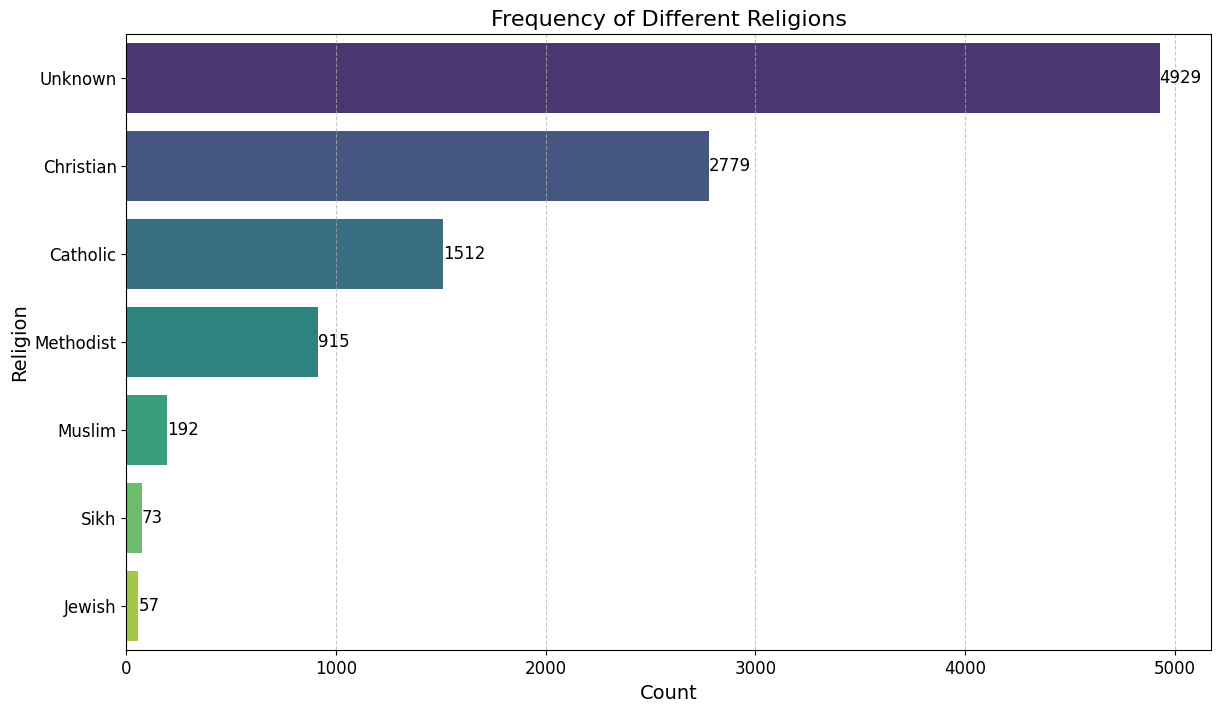

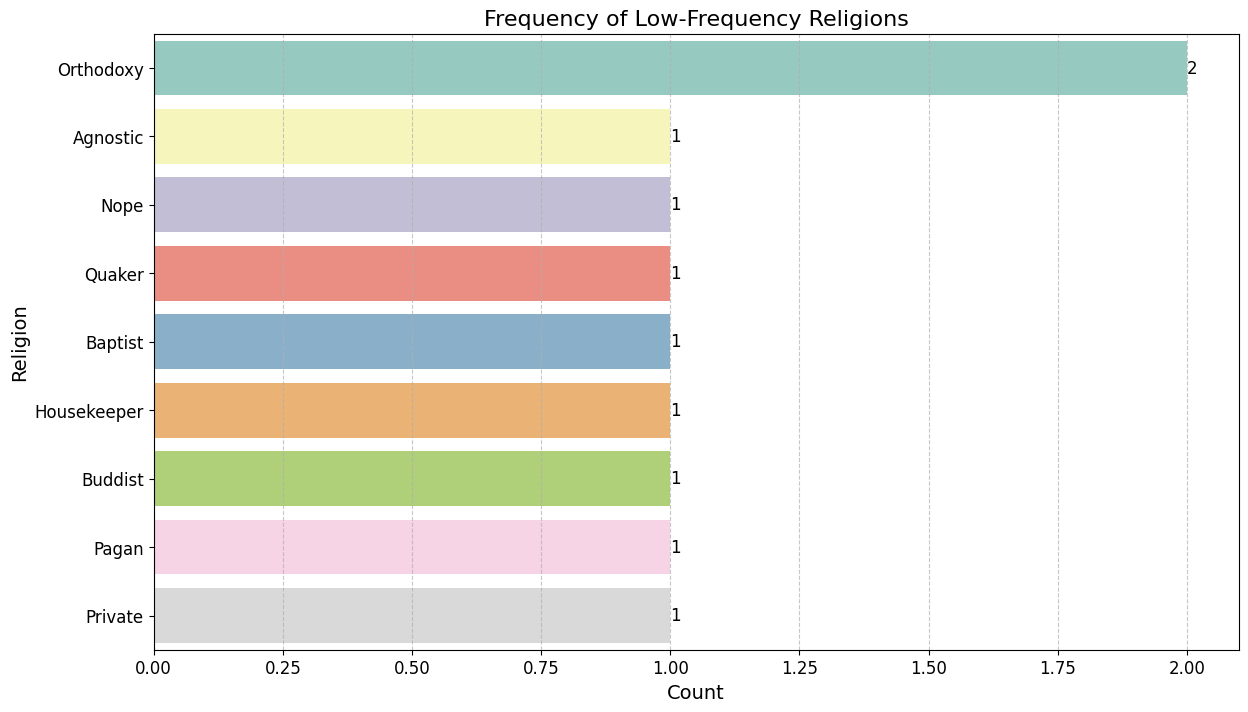

In [50]:
#ploting frequency of different religions
plt.figure(figsize=(14, 8))  #setting the figure size
#creating a count plot with 'Religion on the y-axis and setting title, labels, foont size, and ticks
sns.countplot(y='Religion', data=census_df, order=census_df['Religion'].value_counts().index,  palette='viridis')  
plt.title('Frequency of Different Religions', fontsize=16) #setting the title of the plot with font size
plt.xlabel('Count', fontsize=14)
plt.ylabel('Religion', fontsize=14)  
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

#grid lines on the x-axis with 70% transparency on dashed line
plt.grid(axis='x', linestyle='--', alpha=0.7)  
#looping and adding text to each bar with the count  with vertical and horizonatal alignemnts 
for index, value in enumerate(census_df['Religion'].value_counts()): 
    plt.text(value, index, str(value), va='center', ha='left', fontsize=12) 
#saving the plot 
plt.savefig('frequency_of_different_religionss.png', format='png')  
#saving the plot 
plt.show() 


#low-frequency religions
low_frequency_religions_counts = religion_counts[religion_counts < threshold]

#plot oflow-frequency religions
plt.figure(figsize=(14, 8))  # Set the figure size to 14x8 inches
#bar plot for low-frequency religions and setting title, labels, foont size and ticks
plt.title('Frequency of Low-Frequency Religions', fontsize=16)
sns.barplot(x=low_frequency_religions_counts.values, y=low_frequency_religions_counts.index, palette='Set3')  
plt.xlabel('Count', fontsize=14) 
plt.ylabel('Religion', fontsize=14) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)  

#add grid lines on the x-axis with a dashed line style and 70% transparency
plt.grid(axis='x', linestyle='--', alpha=0.7)  
#looping and adding text to each bar with the count with vertical and horizonatal alignemnts 
for index, value in enumerate(low_frequency_religions_counts):  
    plt.text(value, index, str(value), va='center', ha='left', fontsize=12)
    
#saving the plot 
plt.savefig('low_frequency_religionss.png', format='png')
#showing te plot 
plt.show() 



## Cleaning Marital Status Column/Feature

In [51]:
#checking for nulls/na in Marital Status column
census_df[census_df['Marital Status'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,9475,1,Brightwaterloop Drive,Beth,Anderson,7,Daughter,NaN,Female,Student,NaN,Methodist
4,9474,1,Brightwaterloop Drive,Gerard,Anderson,9,Son,NaN,Male,Student,NaN,Methodist
5,9473,1,Brightwaterloop Drive,Leonard,Anderson,12,Son,NaN,Male,Student,NaN,Methodist
6,9472,1,Brightwaterloop Drive,Gerard,Anderson,13,Son,NaN,Male,Student,NaN,Methodist
10,7765,1,Sheffield Plaza,Ricky,Atkinson,3,Son,NaN,Male,Child,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
10436,6568,232,Strawberry Lights,Adrian,Bell,7,Grandson,NaN,M,Student,NaN,Unknown
10443,6577,235,Strawberry Lights,Raymond,Hughes,4,Son,NaN,Male,Child,NaN,Catholic
10444,6576,235,Strawberry Lights,Tracey,Hughes,6,Daughter,NaN,Female,Student,NaN,Catholic
10449,6582,237,Strawberry Lights,Leonard,Thomas,17,Son,NaN,Male,Student,NaN,Christian


In [52]:
#Anyone married below the age of 18 is a minor otherwise labeled as Unknown
#function to fill Marital Status based on Age
def fill_marital_status(row):
    if pd.isna(row['Marital Status']) and row['Age'] < 18:
        return 'Minor'
    elif pd.isna(row['Marital Status']):
        return 'Unknown'
    else:
        return row['Marital Status']

#Apply fill_marital_status function to each row
census_df['Marital Status'] = census_df.apply(fill_marital_status, axis=1)

#Verify the changes
census_df[census_df['Marital Status'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [53]:
#Another layer of check
census_df[(census_df['Age'] < 18 & (census_df['Marital Status'].isin(['Married','Divorced','Widowed'])))]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [54]:
#checking for sum of na's in each column or feature at this point 
census_df.isna().sum()

Serial Number                        0
House Number                         0
Street                               0
First Name                           0
Surname                              0
Age                                  0
Relationship to Head of House        0
Marital Status                       0
Gender                               0
Occupation                          54
Infirmity                        10377
Religion                             0
dtype: int64

## Cleaning Occupation Column/Feature

In [55]:
#checking for nulls/na in Occupation column
census_df[census_df['Occupation'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
132,6712,1,Zigzag Mall,Dale,Francis,28,Head,Divorced,Male,NaN,NaN,Jewish
147,2290,1,Bradford Circles,Peter,Hill,11,Son,Minor,male,NaN,NaN,Catholic
335,2870,2,Nelson Locks,Jenna,Barrett,0,Daughter,Minor,Female,NaN,NaN,Unknown
549,696,2,Bennett Lane,Gail,Shaw,24,Unknown,Single,Female,NaN,NaN,Methodist
614,4480,3,Parrot Plains,Judith,Bates,4,Daughter,Minor,Female,NaN,NaN,Unknown
653,9332,3,January Knolls,Leonard,Clayton,28,Head,Single,Male,NaN,NaN,Unknown
818,9748,3,CherryChestnutnail Avenue,Luke,Taylor,50,Husband,Married,Male,NaN,NaN,Unknown
894,1729,4,Davies Island,Kimberley,Dunn,11,Daughter,Minor,Female,NaN,NaN,Christian
947,6795,4,Yellow Roads,Kenneth,Hill,31,Lodger,Single,Male,NaN,NaN,Unknown
1205,9044,5,Duck Lodge,Jacob,Fraser,47,Head,Single,Male,NaN,NaN,Methodist


In [56]:
#find the ages of individuals with the occupation 'Student'
student_ages = census_df[census_df['Occupation'] == 'Student']['Age']

#determine the range of ages for students
min_student_age = student_ages.min()
max_student_age = student_ages.max()

#get the most frequent occupation
most_frequent_occupation = census_df['Occupation'].mode()[0]

#fill_occupation function to fill 'Occupation' based on age
def fill_occupation(row):
    if pd.isna(row['Occupation']):
        if min_student_age <= row['Age'] <= max_student_age:
            return 'Student'
        else:
            return most_frequent_occupation
    else:
        return row['Occupation']

#apply the fill_occupation function to each row that is why axis = 1
census_df['Occupation'] = census_df.apply(fill_occupation, axis=1)

#verifying no NaNs are available 
census_df[census_df['Occupation'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## Cleaning Infirmity Column/Feature

In [57]:
#calculating the percentage of NaN values in the 'Infirmity' column
nan_percentage = census_df['Infirmity'].isna().mean() * 100
print(f"Percentage of NaN values in 'Infirmity' column: {nan_percentage:.2f}%")

Percentage of NaN values in 'Infirmity' column: 99.23%


A greater portion of the Infirmity column is filled with NaN, either I drop that column or I fill it with Not Specified in order to retain the 0.77% infirmity in the dataset.

In [58]:
#Checking for  unique values in Infirmity column
census_df['Infirmity'].unique()

array([nan, 'Physical Disability', 'Mental Disability', 'Disabled',
       'Unknown Infection', 'Deaf', 'Blind'], dtype=object)

In [59]:
#filling NaN values with 'Not Specified" instead of discarding the column so as not to discard the 0.77%  (100-99.23) infirmity to maintain data integrity 
census_df['Infirmity'] = census_df['Infirmity'].fillna('Not Specified')

In [60]:
#verifying no na
census_df[census_df['Infirmity'].isna()]

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [61]:
#Final Check to ensure data is properly cleaned up
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10457 entries, 0 to 10456
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Serial Number                  10457 non-null  int64 
 1   House Number                   10457 non-null  int64 
 2   Street                         10457 non-null  object
 3   First Name                     10457 non-null  object
 4   Surname                        10457 non-null  object
 5   Age                            10457 non-null  int64 
 6   Relationship to Head of House  10457 non-null  object
 7   Marital Status                 10457 non-null  object
 8   Gender                         10457 non-null  object
 9   Occupation                     10457 non-null  object
 10  Infirmity                      10457 non-null  object
 11  Religion                       10457 non-null  object
dtypes: int64(3), object(9)
memory usage: 980.5+ KB


In [62]:
total_empty_strings_final_2 = check_empty_strings(census_df)

Total empty strings in DataFrame: 0


In [63]:
#check_missing_values function call
missing_data_final = check_missing_values(census_df)
#data frame display for percentage missing values 
missing_data_final

,Missing Values,Percentage
Serial Number,0,0.0
House Number,0,0.0
Street,0,0.0
First Name,0,0.0
Surname,0,0.0
Age,0,0.0
Relationship to Head of House,0,0.0
Marital Status,0,0.0
Gender,0,0.0
Occupation,0,0.0


In [64]:
#Checking for not available data to know which fields/features still need further attention 
census_df.isna().sum()

Serial Number                    0
House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

## Data Integrity Check After Cleaning 
This helps to know how much data was lost/dropped if during cleaning process some rows were dropped for valid reasons.

In [65]:
#after cleaning
range_index_after_cleaning = len(census_df)

#calculating the percentage of rows retained after cleaning
percentage_range_index = (range_index_after_cleaning / range_index_before_cleaning) * 100

#print the percentage
print(f"Percentage of rows retained after cleaning: {percentage_range_index:.2f}%")

Percentage of rows retained after cleaning: 100.00%


##  Standardization of Gender Column

In [66]:
#checking for unique gender to know how to standardize the column
print(census_df['Gender'].unique())


['Female' 'Male' 'm' 'male' 'M' 'female' 'F' 'f']


In [67]:
#Convert to lowercase
census_df['Gender'] = census_df['Gender'].str.lower()

#strip leading and trailing whitespace
census_df['Gender'] = census_df['Gender'].str.strip()

#mapping gender to standardized values using a dictionary
gender_mapping = {
    'male': 'Male',
    'female': 'Female',
    'm': 'Male',
    'M': 'Male',
    'f': 'Female',
    'F': 'Female'
}

#applying gender_mapping to the iterable (Gender Series) using map function 
census_df['Gender'] = census_df['Gender'].map(gender_mapping)

#verifying the result
print(census_df['Gender'].unique())

['Female' 'Male']


## Saving Cleaned Data For Analysis 

In [68]:
#save_data_model function definition 
def save_data_model(df, file_path, data_type="cleaned"):
    '''
    Saves cleaned or analyzed census data to a specified file path.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to be saved.
    file_path (str): Path where the DataFrame will be saved.
    data_type (str): Type of data being saved, either 'cleaned' or 'analyzed'.
    
    Returns:
    None
    '''
    #saving the dataframe to the specified file path with index set to False
    df.to_csv(file_path, index=False)
    
    #informing the user that the data has been saved
    print(f"{data_type.capitalize()} Census Data has been saved to {file_path}")

In [69]:
#path to save cleaned census data
cleaned_census_data_path ='cleaned_census0.csv'

#save_data_model FUNCTION INVOCATION/CALL
save_data_model(census_df, cleaned_census_data_path, data_type="cleaned")

Cleaned Census Data has been saved to cleaned_census0.csv


In [70]:
#just as I did at teh beginning of data cleaning, this is another layer to confirm my dataset (census data) is clean before starting analysis 
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10457 entries, 0 to 10456
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Serial Number                  10457 non-null  int64 
 1   House Number                   10457 non-null  int64 
 2   Street                         10457 non-null  object
 3   First Name                     10457 non-null  object
 4   Surname                        10457 non-null  object
 5   Age                            10457 non-null  int64 
 6   Relationship to Head of House  10457 non-null  object
 7   Marital Status                 10457 non-null  object
 8   Gender                         10457 non-null  object
 9   Occupation                     10457 non-null  object
 10  Infirmity                      10457 non-null  object
 11  Religion                       10457 non-null  object
dtypes: int64(3), object(9)
memory usage: 980.5+ KB


# Census Data Analysis - Early Insights  

NOTE: For analysis I could load the cleaned saved data or I could continue with the current census data from in memory which can have a compuational gain. I will continue with my current dataframe in memory.

## Population Age Pyramid

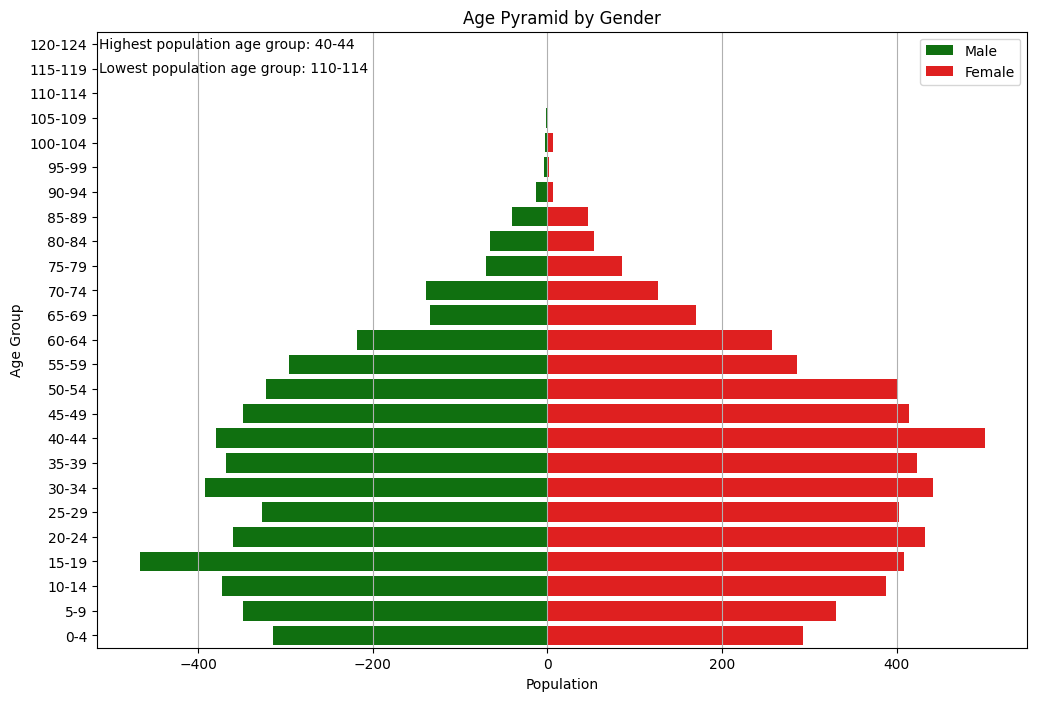

In [71]:
#creating age bins and labels for population age pyramid
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', 
          '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', 
         '90-94', '95-99', '100-104', '105-109', '110-114', '115-119', '120-124']

#adding age group labels to the census_df
census_df['Age Group'] = pd.cut(census_df['Age'], bins=bins, labels=labels, right=False)

#counting the number of males and females in each age group
age_gender_counts = census_df.groupby(['Age Group', 'Gender'],observed=False).size().unstack().fillna(0)

#creating a data frame for plotting
age_pyramid = pd.DataFrame({
    'Age Group': labels,
    'Male': -age_gender_counts['Male'],  #adding negative values for males
    'Female': age_gender_counts['Female']
})

#calculating the  total population for each age group
age_pyramid['Total'] = age_pyramid['Male'].abs() + age_pyramid['Female']

#finding the age group with the highest and lowest total population
max_age_group = age_pyramid.loc[age_pyramid['Total'].idxmax(), 'Age Group']
min_age_group = age_pyramid.loc[age_pyramid['Total'].idxmin(), 'Age Group']

#definng the order of age classes
AgeClass = labels

#plot initialization
plt.figure(figsize=(12, 8))

#male data set in barplot (negative values)
sns.barplot(x='Male', y='Age Group', data=age_pyramid, order=AgeClass, color='green', label='Male')

#female data in barplot (positive values)
sns.barplot(x='Female', y='Age Group', data=age_pyramid, order=AgeClass, color='red', label='Female')

#adding titles and labels to plot 
plt.title('Age Pyramid by Gender')
plt.xlabel('Population')
plt.ylabel('Age Group')

#adding the vertical grid lines on the population axis
plt.grid(axis='x')

#y-axis inversion such that to have the youngest age at the bottom of teh pyramid
plt.gca().invert_yaxis()

#adding text to the pyramid plot for the highest and lowest population age groups
plt.text(-max(age_pyramid['Male'].abs())*1.1, len(labels)-1, f'Highest population age group: {max_age_group}', horizontalalignment='left', verticalalignment='center')
plt.text(-max(age_pyramid['Male'].abs())*1.1, len(labels)-2, f'Lowest population age group: {min_age_group}', horizontalalignment='left', verticalalignment='center')

#displaying the plot with a legend 
plt.legend()
#saving visualization
plt.savefig('Age_Pyramid_by_Gender.png', format='png')
#showing visualization
plt.show()

In [72]:
#census data statistical details using describe function on numerical features 
census_df.describe()

,Serial Number,House Number,Age
count,10457.000000,10457.000000,10457.000000
mean,5228.000000,44.321029,35.225686
std,3018.820217,49.253621,21.080922
min,0.000000,1.000000,0.000000
25%,2614.000000,11.000000,18.000000
50%,5228.000000,27.000000,34.000000
75%,7842.000000,53.000000,50.000000
max,10456.000000,240.000000,106.000000


In [73]:
#viewing my census_df to see Age Group Column newly added for analysis
census_df

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
0,9465,1,Paladin Lane,Mandy,Adams,87,Head,Widowed,Female,Retired Engineering geologist,Not Specified,Unknown,85-89
1,2782,1,Craig Unions,Jayne,Ali,24,Lodger,Single,Female,Environmental consultant,Not Specified,Sikh,20-24
2,10421,1,Hayward Manorhouse,Paige,Allen,45,Head,Single,Female,"Scientist, physiological",Not Specified,Catholic,45-49
3,9475,1,Brightwaterloop Drive,Beth,Anderson,7,Daughter,Minor,Female,Student,Not Specified,Methodist,5-9
4,9474,1,Brightwaterloop Drive,Gerard,Anderson,9,Son,Minor,Male,Student,Not Specified,Methodist,5-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10452,6583,238,Strawberry Lights,Fiona,Hart,42,Head,Married,Female,Fitness centre manager,Not Specified,Muslim,40-44
10453,6584,238,Strawberry Lights,Leslie,Hart,43,Husband,Married,Male,"Editor, film/video",Not Specified,Muslim,40-44
10454,6586,239,Strawberry Lights,John,Hall,11,Son,Minor,Male,Student,Not Specified,Unknown,10-14
10455,6585,239,Strawberry Lights,Ruth,Hall,33,Head,Divorced,Female,Dance movement psychotherapist,Not Specified,Unknown,30-34


## Population Demographics

In [74]:
#calculating total population
total_population = len(census_df)

#calculating gender distribution
gender_counts = census_df['Gender'].value_counts()
percentage_female = (gender_counts.get('Female', 0) / total_population) * 100
percentage_male = (gender_counts.get('Male', 0) / total_population) * 100

#calculate age distribution in different age groups
age_groups = {
    '0-19': census_df[(census_df['Age'] >= 0) & (census_df['Age'] <= 19)],
    '20-39': census_df[(census_df['Age'] >= 20) & (census_df['Age'] <= 39)],
    '40-64': census_df[(census_df['Age'] >= 40) & (census_df['Age'] <= 64)],
    '65+': census_df[census_df['Age'] >= 65]
}

percentage_age_0_19 = (len(age_groups['0-19']) / total_population) * 100
percentage_age_20_39 = (len(age_groups['20-39']) / total_population) * 100
percentage_age_40_64 = (len(age_groups['40-64']) / total_population) * 100
percentage_age_65_plus = (len(age_groups['65+']) / total_population) * 100

#calculating the median age
median_age = census_df['Age'].median()

#printing the population results
print(f"The town has a population of {total_population} people.")
print(f"{gender_counts.get('Female', 0)} of the population is female ({percentage_female:.1f}%) and {gender_counts.get('Male', 0)} is male ({percentage_male:.1f}%).")
print(f"{percentage_age_0_19:.1f}% of the population is aged between 0 and 19,")
print(f"{percentage_age_20_39:.1f}% of the population is aged between 20 and 39,")
print(f"{percentage_age_40_64:.1f}% of the population is aged between 40 and 64, and")
print(f"{percentage_age_65_plus:.1f}% of the population are over the age of sixty-five.")
print(f"Overall, the town has a median age of {median_age:.0f} years.")

The town has a population of 10457 people.
5472 of the population is female (52.3%) and 4985 is male (47.7%).
27.9% of the population is aged between 0 and 19,
30.1% of the population is aged between 20 and 39,
32.7% of the population is aged between 40 and 64, and
9.2% of the population are over the age of sixty-five.
Overall, the town has a median age of 34 years.


# Further Analysis

##  The Task 
The town from the census is a modestly sized one sandwiched between two much larger cities that it 
is connected to by motorways. The town does not have a university, but students do live in the town 
and commute to the nearby cities. Once you have a cleaned data set to analyse, your task is to decide 
the following:

### (a) What should be built on an unoccupied plot of land that the local government wishes to develop? Your choices are:

i. High-density housing. This should be built if the population is significantly expanding. 
ii. Low-density housing. This should be built if the population is “affluent” and there is demand 
for large family housing. 
iii. Train station. There are potentially a lot of commuters in the town and building a train station 
could take pressure off the roads. But how will you identify commuters? 
iv. Religious building. There is already one place of worship for Catholics in the town. Is there 
demand for a second Church (if so, which denomination?), or for a different religious 
building? 
v. Emergency medical building. Not a full hospital, but a minor injuries centre. This should be 
built if there are many injuries or future pregnancies likely in the population. 
vi. Something else? 
Whichever you choose, you must justify it from the data set provided to you and argue it is a priority 
against other choices.

### (b) Which one of the following options should be invested in? 
i. Employment and training. If there is evidence for a significant amount of unemployment, we 
should re-train people for new skills. 
ii. Old age care. If there is evidence that there will be an increased number of retired people in 
future years, the town will need to allocate more funding for end-of-life care. 
iii. Increase spending for schooling. If there is evidence of a growing population of school-aged 
children (new births, or families moving into the town), then the schooling spend should 
increase. 
iv. General infrastructure. If the town is expanding, then services (waste collection; road 
maintenance, etc.) will require more investment. 


## To address these two questions, it is suggested that some of the analysis you undertake is:

• Examine the age distribution (age pyramid) of the population. Is it growing or shrinking? Will 
there be more people of retirement age in the future, more school-aged children, more young 
people, etc. 

• Examine unemployment trends. Are certain ages more likely to be unemployed than others? 
• Examine religious affiliations. Are any religions growing, or shrinking? Are there any newer 
religions that are increasing in numbers? 
• Examine the divorce and marriage rate. This might impact how you think about housing. 
• Examine the occupancy level (how many people per house) and determine if existing housing 
is being under or over-used. 
• Examine the number of university students. All of these are commuters since there are no 
universities in the town. Are there any other professions that are likely to be commuters? 
• What is the birth rate and the death rate for the town?


These are merely suggestions, and there are many other analyses that could be undertaken that will be 
discussed in the lectures and the labs. Ultimately, your answers to (a) and (b) must be justified from 
the census data and argued by balancing the different needs of the population and supported through 
statistics and where appropriate, hypothesis testing.
[As a disclaimer: any reference to real people or places, living or dead, is purely coincidental and a 
product of the random generators that have been used.] 

## Estimating Birth Rate 
To do this, we need the number of potential women of childbearing age. This is much more of an 
assumption. We could assume that this is all women between 25-29 for instance.

In [75]:
#filter for number of children aged zero(0) in the cleaned data
num_children_aged_0 = census_df[census_df['Age'] == 0]

#viewing my result
num_children_aged_0

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
168,6781,1,Yellow Roads,Howard,Johnson-Baxter,0,Son,Minor,Male,Child,Not Specified,Unknown,0-4
287,256,1,Eagle Road,Bethan,Ward,0,Daughter,Minor,Female,Child,Not Specified,Unknown,0-4
335,2870,2,Nelson Locks,Jenna,Barrett,0,Daughter,Minor,Female,Student,Not Specified,Unknown,0-4
440,10056,2,Moore Village,Leonard,Francis,0,Son,Minor,Male,Child,Not Specified,Unknown,0-4
490,4753,2,February Lodge,Howard,Jones,0,Son,Minor,Male,Child,Not Specified,Unknown,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10166,5858,188,February Lodge,Mohammad,Jones,0,Son,Minor,Male,Child,Not Specified,Unknown,0-4
10167,5859,188,February Lodge,Janet,Jones,0,Daughter,Minor,Female,Child,Not Specified,Unknown,0-4
10178,6453,189,Strawberry Lights,Glenn,Barber,0,Son,Minor,Male,Child,Not Specified,Unknown,0-4
10260,2276,195,Lloyd Avenue,Diane,Whitehead-Greenwood,0,Daughter,Minor,Female,Child,Not Specified,Unknown,0-4


In [76]:
#filter for women aged 25-29 in the cleaned data
women_aged_25_29 = census_df[(census_df['Age'] >= 25) & (census_df['Age'] <= 29) & (census_df['Gender'] == 'Female')]

#viewing my result
women_aged_25_29

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
12,7763,1,Sheffield Plaza,Joanna,Atkinson,28,Head,Married,Female,"Engineer, aeronautical",Not Specified,Christian,25-29
42,4742,1,February Lodge,Hayley,Barnes,25,Daughter,Single,Female,Museum/gallery conservator,Not Specified,Unknown,25-29
43,4741,1,February Lodge,Zoe,Barnes,29,Daughter,Single,Female,Field seismologist,Not Specified,Unknown,25-29
51,1777,1,Lloyd Avenue,Cheryl,Bird,26,Head,Single,Female,Ship broker,Not Specified,Unknown,25-29
53,782,1,Rhubarb Street,Joanne,Bishop,27,Daughter,Single,Female,Dietitian,Not Specified,Methodist,25-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10307,6482,200,Strawberry Lights,Kimberley,Patel,29,Head,Married,Female,"Engineer, maintenance",Not Specified,Catholic,25-29
10362,5961,206,February Lodge,Zoe,Butler,25,Daughter,Single,Female,Sales executive,Not Specified,Christian,25-29
10369,5968,207,February Lodge,Zoe,Walters,25,Head,Single,Female,PhD Student,Not Specified,Catholic,25-29
10370,5972,208,February Lodge,Louise,Lane,28,Daughter,Single,Female,Systems developer,Not Specified,Unknown,25-29


In [77]:
#getting numerical value of num_children_aged_0
print(len(num_children_aged_0))

#getting numerical value of women_aged_25_29
print(len(women_aged_25_29))

#using a population size of 100000
num_of_persons = 100000

#computing birth rate per 100,000 women aged 25-29
birth_rate_per_100000 = round((len(num_children_aged_0)/len(women_aged_25_29))*num_of_persons)
birth_rate_per_100000
print(f'The birth rate is {birth_rate_per_100000:.2f} per 100,000')

109
403
The birth rate is 27047.00 per 100,000


## Evolving Birth Rate  

In [78]:
#filter children age 4
num_children_aged_4 = census_df[census_df['Age'] == 4]

#viewing result
num_children_aged_4

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
24,10407,1,Guinevere Tower,Gillian,Ball,4,Daughter,Minor,Female,Child,Not Specified,Catholic,0-4
81,10416,1,Derby Chalet,Amelia,Clarke,4,Minor,Minor,Female,Child,Not Specified,Unknown,0-4
288,255,1,Eagle Road,Glen,Ward,4,Son,Minor,Male,Child,Not Specified,Unknown,0-4
296,10441,1,Morris Keep,Margaret,Welch,4,Daughter,Minor,Female,Child,Not Specified,Catholic,0-4
310,2971,1,Cook Drives,Lucy,Wilson,4,Daughter,Minor,Female,Child,Not Specified,Christian,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043,6421,175,Strawberry Lights,Annette,Woods,4,Daughter,Minor,Female,Child,Not Specified,Catholic,0-4
10092,5810,180,February Lodge,Bradley,Smith,4,Son,Minor,Male,Child,Not Specified,Christian,0-4
10168,5857,188,February Lodge,Jay,Jones,4,Son,Minor,Male,Child,Not Specified,Unknown,0-4
10323,5941,202,February Lodge,Jeremy,Jones-Brady,4,Son,Minor,Male,Child,Not Specified,Unknown,0-4


In [79]:
#filter women between age 30-34
women_aged_30_34 = census_df[(census_df['Age'] >= 30) & (census_df['Age'] <= 34)& (census_df['Gender'] == 'Female')]

#viewing the result
women_aged_30_34

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
48,6778,1,Yellow Roads,Marian,Baxter,34,Head,Unknown,Female,Tourism officer,Not Specified,Christian,30-34
120,5973,1,Strawberry Lights,Jade,Elliott,30,Head,Married,Female,Commercial/residential surveyor,Not Specified,Unknown,30-34
304,4606,1,Sagittarius Field,Jean,Williams,34,Head,Single,Female,Unemployed,Not Specified,Catholic,30-34
365,1362,2,Mistletoe Crescent,Annette,Cameron,30,Daughter,Single,Female,"Engineer, control and instrumentation",Not Specified,Unknown,30-34
388,9744,2,CherryChestnutnail Avenue,Paige,Dale,32,Head,Single,Female,Unemployed,Not Specified,Unknown,30-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10393,6529,217,Strawberry Lights,Amy,Ahmed,33,Daughter,Single,Female,Personal assistant,Not Specified,Catholic,30-34
10408,6536,221,Strawberry Lights,Vanessa,Stone,34,Head,Single,Female,Senior tax professional/tax inspector,Not Specified,Unknown,30-34
10430,6560,230,Strawberry Lights,Joan,Myers,32,Head,Single,Female,PhD Student,Not Specified,Christian,30-34
10446,6574,235,Strawberry Lights,Kathleen,Hughes,31,Head,Married,Female,"Engineer, biomedical",Not Specified,Catholic,30-34


In [80]:
#Compute the evolving  birth rate for children aged 4 per 100,000 women aged 30-34
birth_rate_children_aged_4 = round((len(num_children_aged_4)/len(women_aged_30_34))*num_of_persons)
#printing birth rate for children aged 4 per 100,000
print("Evolving birth rate for children aged 4 per 100,000 women aged 30-34 = ", birth_rate_children_aged_4)

Evolving birth rate for children aged 4 per 100,000 women aged 30-34 =  31973


Assumption Made: That children aged 4 have their mothers between the age of 30-34 as seen from the data

## Death Rate 
As taught in class/workshop one way we could try to compute a death rate is to look at the differential of the number of 
people in one age bracket, compared to a younger one. Say age range 56-60, versus 61-65. 
Assuming that the number of people in each of these two 
generations were the same when they were the same age. So we can guage how many may have died in the past 5years.

In [81]:
#function definition of compute_annual_death_rate
def compute_annual_death_rate(data_frame, younger_old_age, older_age):
    #Number of people in the two age ranges and using shape function to count the number of rows when index is 0
    num_people_aged_range1 = data_frame[(data_frame['Age'] >= younger_old_age[0]) & (data_frame['Age'] <= younger_old_age[1])].shape[0]
    num_people_aged_range2 = data_frame[(data_frame['Age'] >= older_age[0]) & (data_frame['Age'] <= older_age[1])].shape[0]
    
    #Computing number of deaths over 5 years
    num_deaths_over_5_years = num_people_aged_range1 - num_people_aged_range2
    
    #Computing annual death rate per 100,000
    if num_people_aged_range1 > 0:
        annual_death_rate_per_100000 = (num_deaths_over_5_years / num_people_aged_range1) * (100000 / 5) #considering 5year interval
    else:
        annual_death_rate_per_100000 = 0
    
    return annual_death_rate_per_100000
    
#passing age ranges as tuple 
age_range1 = (56, 60)
age_range2 = (61, 65)

#compute_annual_death_rate function call
annual_death_rate = compute_annual_death_rate(census_df, age_range1, age_range2)

#printing annual death rate
print(f"Annual death rate per 100,000 for age range {age_range1} to {age_range2} is {annual_death_rate:.2F}")

Annual death rate per 100,000 for age range (56, 60) to (61, 65) is 5177.30


Analysis and Assumptions
Assumptions for Birth Rate and Evolving Birth Rate:

The number of women aged 25-29 is a valid proxy for the childbearing population.
Using the number of children aged 0 and 4 to estimate birth rates implicitly assumes that the fertility rate and survival rate of infants have been stable over time.
Assumptions for Death rate

The assumption that the number of people in the age groups 56-60 and 61-65 was the same when they were younger is not 100% correct, as it ignores factors like birth rates, migration, and historical mortality rates.
The computed death rate is an approximation that does not account for population growth, aging, or other demographic changes.

## Death rate per annum age ranges aged 66-70 and 71-75

In [82]:
#computing for age ranges aged 66-70 and 71-75 with the same assumptions. 
#passing age ranges as tuple 
age_range1 = (66, 70)
age_range2 = (71, 75)

#compute_annual_death_rate function call
annual_death_rate = compute_annual_death_rate(census_df, age_range1, age_range2)

#printing annual death rate
print(f"Annual death rate per 100,000 for ages {age_range1} to {age_range2} is {annual_death_rate}")

Annual death rate per 100,000 for ages (66, 70) to (71, 75) is 5642.6332288401245


## Death rate per annum in different older age groups

In [83]:
#computing for age ranges aged 76-80 and 81-85 with the same assumptions. 
#passing age ranges as tuple
age_range1 = (76, 80)
age_range2 = (81, 85)

#compute_annual_death_rate function call
annual_death_rate_76_80_81_85 = compute_annual_death_rate(census_df, age_range1, age_range2)

#printing annual death rate
print(f"Annual death rate per 100,000 for ages {age_range1} to {age_range2}: {annual_death_rate}")

Annual death rate per 100,000 for ages (76, 80) to (81, 85): 5642.6332288401245


In [84]:
#computing for age ranges aged 86-90 and 91-95 with the same assumptions. 
#passing age ranges as tuple
age_range1 = (86, 90)
age_range2 = (91, 95)

#compute_annual_death_rate function call
annual_death_rate = compute_annual_death_rate(census_df, age_range1, age_range2)

#printing annual death rate
print(f"Annual death rate per 100,000 for ages {age_range1} to {age_range2}: {annual_death_rate}")

Annual death rate per 100,000 for ages (86, 90) to (91, 95): 14925.37313432836


In [85]:
#computing for age ranges aged 96-100 and 101-105 with the same assumptions. 
#passing age ranges as tuple
age_range1 = (96, 100)
age_range2 = (101, 105)

#compute_annual_death_rate function call
annual_death_rate = compute_annual_death_rate(census_df, age_range1, age_range2)

#printing annual death rate
print(f"Annual death rate per 100,000 for ages {age_range1} to {age_range2}: {annual_death_rate}")

Annual death rate per 100,000 for ages (96, 100) to (101, 105): -6666.666666666666


In [86]:
#computing for age ranges aged 106-110 and 111-115 with the same assumptions. 
#passing age ranges as tuple
age_range1 = (106, 110)
age_range2 = (111, 115)

#compute_annual_death_rate function call
annual_death_rate = compute_annual_death_rate(census_df, age_range1, age_range2)

#printing annual death rate
print(f"Annual death rate per 100,000 for ages {age_range1} to {age_range2}: {annual_death_rate}")

Annual death rate per 100,000 for ages (106, 110) to (111, 115): 20000.0


In [87]:
#computing for age ranges aged 116-120 and 121-125 with the same assumptions. 
#passing age ranges as tuple
age_range1 = (116, 120)
age_range2 = (121, 125)

#compute_annual_death_rate function call
annual_death_rate = compute_annual_death_rate(census_df, age_range1, age_range2)

#printing annual death rate
print(f"Annual death rate per 100,000 for ages {age_range1} to {age_range2}: {annual_death_rate}")

Annual death rate per 100,000 for ages (116, 120) to (121, 125): 0


## Total Death Rate(Number of Deaths per 100000) across all age groups

In [88]:
#list of tuples as age ranges
age_groups = [
    (56, 60), (61, 65), (66, 70), (71, 75), (76, 80), (81, 85),
    (86, 90), (91, 95), (96, 100), (101, 105), (106, 110), 
    (111, 115), (116, 120), (121, 125)
]

#variable to hold sum of death rate of all age groups
total_death_rate = 0
#loop  through age group except the last lement to avoid index out of bound error when comparing age groups
for i in range(len(age_groups) - 1):
    #get current age group
    age_range1 = age_groups[i]
    #get next age group
    age_range2 = age_groups[i + 1]
    #compute_annual_death_rate function call
    death_rate = compute_annual_death_rate(census_df, age_range1, age_range2)
    #add death_rate to total_death_rate
    total_death_rate += death_rate
    #print annual death rate
    print(f"Annual death rate per 100,000 for ages {age_range1} to {age_range2}: {death_rate}")
#print total annual death rate
print(f"Total annual death rate per 100,000 for all age groups: {round(total_death_rate)}")


Annual death rate per 100,000 for ages (56, 60) to (61, 65): 5177.3049645390065
Annual death rate per 100,000 for ages (61, 65) to (66, 70): 4736.8421052631575
Annual death rate per 100,000 for ages (66, 70) to (71, 75): 5642.6332288401245
Annual death rate per 100,000 for ages (71, 75) to (76, 80): 7336.244541484717
Annual death rate per 100,000 for ages (76, 80) to (81, 85): 3034.4827586206898
Annual death rate per 100,000 for ages (81, 85) to (86, 90): 9105.69105691057
Annual death rate per 100,000 for ages (86, 90) to (91, 95): 14925.37313432836
Annual death rate per 100,000 for ages (91, 95) to (96, 100): 12941.176470588236
Annual death rate per 100,000 for ages (96, 100) to (101, 105): -6666.666666666666
Annual death rate per 100,000 for ages (101, 105) to (106, 110): 17500.0
Annual death rate per 100,000 for ages (106, 110) to (111, 115): 20000.0
Annual death rate per 100,000 for ages (111, 115) to (116, 120): 0
Annual death rate per 100,000 for ages (116, 120) to (121, 125): 0


## Analysis of Population Growth Based on Birth and Death Rates

Population Growth Determination:
To determine if the population is growing, we compare the birth rate and death rate per 100,000:

- **Birth Rate per 100,000:** 27047
- **Death Rate per 100,000:** 93733

Since the death rate is significantly higher than the birth rate, the population is shrinking based on these rates alone.

**Justification and Caveats:**

1. **Assumptions**
   - The birth rate calculation is based on the number of children aged 0 and women aged 25-29, which might not fully represent the actual birth rate of the entire population.
   - The death rate assumes a direct comparison of adjacent age groups, which neglects factors like migration, improvements in healthcare, and other demographic changes.
   - This approach assumes that every person in the older age group came from the younger age group, ignoring external factors such as immigration and emigration.

2. **Caveats:**
   - **Migration:** Inward and outward migration can significantly impact population growth. For instance, if many young people move into the area, the birth rate might increase, or if older individuals move out, the death rate might decrease.
   - **Temporal Changes:** Improvements in healthcare, lifestyle changes, and other socio-economic factors can influence birth and death rates over time.

## Estimating Immigration & Emigration per 100,000 

In [89]:
#filtering number of lodgers and vistors in the town
lodgers_visitors = census_df[(census_df['Relationship to Head of House'] == 'Lodger') | (census_df['Relationship to Head of House'] == 'Visitor')]

#getting the length of lodgers_visitors
num_lodgers_visitors = len(lodgers_visitors)

#Assumption here is that half of the number lodgers and visitors have immigrated from the two bigger cities arounf the town
potential_immigrants = num_lodgers_visitors * 0.5

#filtering number of divorcees  in the town
divorcees = census_df[(census_df['Marital Status'] == 'Divorced')]

#getting the length of divorcees
num_divorcees = len(divorcees)

#Assumption here is that half of the divorcees have emigrated after having a divorce 
potential_emigrants = num_divorcees * 0.5

#Computing immigration and emigration rates per 100,000 
total_population = len(census_df)
immigration_rate_per_100000 = (potential_immigrants / total_population) * 100000
emigration_rate_per_100000 = (potential_emigrants / total_population) * 100000

#Peinti Immigration & Emigration Rates
print(f"Immigration rate per 100,000: {immigration_rate_per_100000:.2f}")
print(f"Emigration rate per 100,000: {emigration_rate_per_100000:.2f}")


Immigration rate per 100,000: 2400.31
Emigration rate per 100,000: 4528.07


In [90]:
#we have these birth rate per 100000 (birth_rate_per_100000) and total_death_rate per 100000 (total_death_rate) rates from above
#and I will be using these reassigned variables everyhwere else in the analysis to to enhance memory management. 
birth_rate_per_100000 = birth_rate_per_100000
death_rate_per_100000 = total_death_rate

#calculating net growth rate
net_growth_rate_per_100000 = birth_rate_per_100000 - death_rate_per_100000 + immigration_rate_per_100000 - emigration_rate_per_100000

#printing net growth rate
print(f"Net growth rate per 100,000: {net_growth_rate_per_100000}")

#determining if population is growing or shrinking
if net_growth_rate_per_100000 > 0:
    print("The population is growing.")
else:
    print("The population is shrinking.")

Net growth rate per 100,000: -68813.8429021228
The population is shrinking.


In [91]:
#filtering visitors and using length function to estimate number of vistors
vistors = census_df[(census_df['Relationship to Head of House'] == 'Visitor')]
len(vistors)

27

In [92]:
#filtering lodgers and visitors using length function to estimate total number of vistors and lodgers in the town
lodgers_vistors = census_df[(census_df['Relationship to Head of House'] == 'Lodger') | (census_df['Relationship to Head of House'] == 'Visitor')]
len(lodgers_vistors)

502

In [93]:
#filtering divorced  individuals and using pandas to view data frame/estimate number of divorcees
divorced_persons = census_df[(census_df['Marital Status'] == 'Divorced')]
divorced_persons

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
39,4744,1,February Lodge,Connor,Barnes,23,Son,Divorced,Male,Arboriculturist,Not Specified,Unknown,20-24
40,4745,1,February Lodge,Cheryl,Barnes,23,Daughter,Divorced,Female,Systems analyst,Not Specified,Unknown,20-24
59,6783,1,Yellow Roads,Nigel,Bradley,48,Lodger,Divorced,Male,Hydrologist,Not Specified,Unknown,45-49
66,10450,1,Brass Barracks,Danny,Bryan,34,Son,Divorced,Male,Fisheries officer,Not Specified,Unknown,30-34
67,10448,1,Brass Barracks,Alan,Bryan,37,Son,Divorced,Male,Public house manager,Not Specified,Christian,35-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10406,6539,221,Strawberry Lights,Graham,Sharp,24,Lodger,Divorced,Male,Ranger/warden,Not Specified,Methodist,20-24
10413,6543,224,Strawberry Lights,Jake,Brooks,63,Head,Divorced,Male,Clinical research associate,Not Specified,Christian,60-64
10427,6553,229,Strawberry Lights,Katy,Green,58,Head,Divorced,Female,Unemployed,Not Specified,Christian,55-59
10448,6578,236,Strawberry Lights,Abbie,Ward,62,Head,Divorced,Female,"Editor, film/video",Not Specified,Unknown,60-64


## Typical Occupancy per House [Number of people per house]

In [94]:
#compute_typical_occupancy function definition
def compute_typical_occupancy(data_frame):
    """
    Calculatin the average number of people per house for each street.
    This function aggregates the data by street and house number, counts the number of people
    in each house, and then calculates the average occupancy per street.
    """
    #grouping census data by 'Street' and 'House Number' to get the count of people in each house.
    #this creates a new dataFrame where each row represents a unique house and its count.
    occupancy = data_frame.groupby(['Street', 'House Number']).size().reset_index(name='Number of People')
    
    #calculating mean occupancy per street by grouping the data by 'Street'.
    typical_occupancy = occupancy.groupby('Street')['Number of People'].mean().reset_index(name='Average Occupancy')

    return typical_occupancy

#calculating typical occupancy for each street by calling the compute_typical_occupancy function.
typical_occupancy = compute_typical_occupancy(census_df)

#printing typical Occupancy per Street:
print("Typical Occupancy per Street:")
print(typical_occupancy)

Typical Occupancy per Street:
                Street  Average Occupancy
0       Aberdeen House           5.000000
1       Aberdeen Ranch           2.000000
2      Allan Mountains           2.657143
3    Anderson Villages           1.638298
4          Anvil Rocks           5.000000
..                 ...                ...
100    Williams Street           2.900000
101      Wilson Canyon           3.250000
102   Winchester Field           3.595745
103       Yellow Roads           3.910714
104        Zigzag Mall           1.733333

[105 rows x 2 columns]


In [95]:
#compute_occupancy_difference function definition
def compute_occupancy_difference(data_frame, typical_occupancy):
    """
    Computes the difference between actual occupancy and typical occupancy for each house.
    This function merges actual occupancy data with typical occupancy data and calculates the deviation
    for each house compared to the average for its street.
    """
    #grouping by 'Street' and 'House Number' to count the number of people in each house.
    occupancy = data_frame.groupby(['Street', 'House Number']).size().reset_index(name='Number of People')
    
    #merging actual occupancy data with typical occupancy data based on the street.
    #this will lead to a new dataFrame with both actual and average occupancy values for each house.
    occupancy_with_avg = occupancy.merge(typical_occupancy, on='Street', how='left')
    
    #calculating difference between actual occupancy and typical occupancy.
    #the new column shows how much each house deviates from the average occupancy of its street.
    occupancy_with_avg['Occupancy Difference'] = occupancy_with_avg['Number of People'] - occupancy_with_avg['Average Occupancy']
    
    return occupancy_with_avg

#calculating difference in occupancy by calling the compute_occupancy_difference function.
occupancy_difference = compute_occupancy_difference(census_df, typical_occupancy)

#printing Occupancy Difference per House:
print("Occupancy Difference per House:")
print(occupancy_difference)

Occupancy Difference per House:
               Street  House Number  Number of People  Average Occupancy  \
0      Aberdeen House             1                 5           5.000000   
1      Aberdeen Ranch             1                 2           2.000000   
2     Allan Mountains             1                 5           2.657143   
3     Allan Mountains             2                 2           2.657143   
4     Allan Mountains             3                 3           2.657143   
...               ...           ...               ...                ...   
3406      Zigzag Mall            11                 4           1.733333   
3407      Zigzag Mall            12                 3           1.733333   
3408      Zigzag Mall            13                 1           1.733333   
3409      Zigzag Mall            14                 2           1.733333   
3410      Zigzag Mall            15                 1           1.733333   

      Occupancy Difference  
0                 0.000000

In [96]:
#need_for_more_housing function definition
def need_for_more_housing(occupancy_difference):
    """
    Determines the need for more housing based on occupancy differences.
    This function analyzes the occupancy differences to identify overcrowded and underutilized houses,
    and then assesses if there is a general demand for more housing.
    """
    #filtering houses where occupancy is higher than typical, indicating overcrowding.
    overcrowded_houses = occupancy_difference[occupancy_difference['Occupancy Difference'] > 0]
    
    #Filtering houses where occupancy is lower than typical, indicating underutilization.
    underutilized_houses = occupancy_difference[occupancy_difference['Occupancy Difference'] < 0]
    
    #counting the number of overcrowded houses.
    num_overcrowded_houses = len(overcrowded_houses)
    
    #Counting the number of underutilized houses.
    num_underutilized_houses = len(underutilized_houses)

    #printing Number of overcrowded houses and Number of underutilized houses
    print(f"Number of overcrowded houses: {num_overcrowded_houses}")
    print(f"Number of underutilized houses: {num_underutilized_houses}")
    
    #checking if there is a need for more housing based on the counts of overcrowded and underutilized houses.
    # If there are more overcrowded houses, it suggests a demand for additional housing.
    if num_overcrowded_houses > num_underutilized_houses:
        print("There is a demand for more housing.")
    else:
        print("There may not be a demand for more housing based on current occupancy.")

#calling the need_for_more_housing function, to analyze whether additional housing is required.
need_for_more_housing(occupancy_difference)

Number of overcrowded houses: 1342
Number of underutilized houses: 2036
There may not be a demand for more housing based on current occupancy.


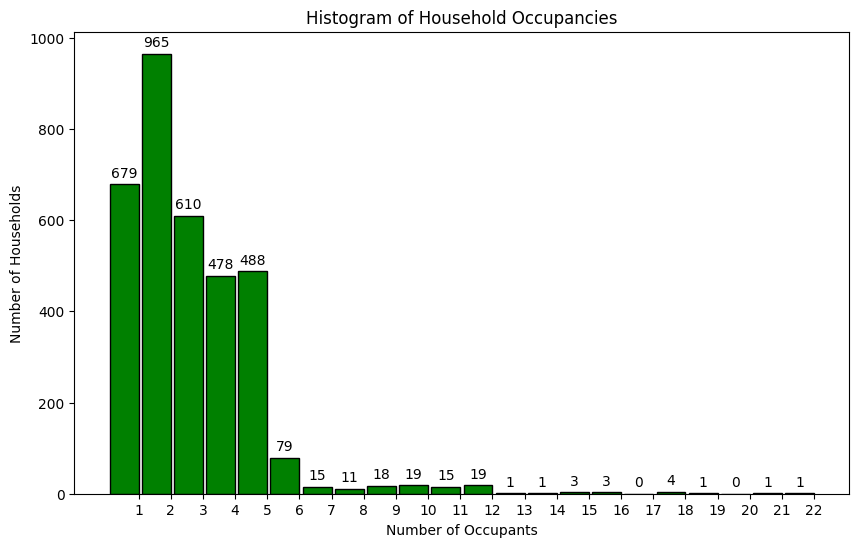

In [97]:
#recalculating occupancy for plotting histogram.
occupancy = census_df.groupby(['Street', 'House Number']).size().reset_index(name='Occupants')

#plot sixe
plt.figure(figsize=(10, 6))

#defining bins for the histogram to categorize the number of occupants.
bins = np.arange(1, occupancy['Occupants'].max() + 2)
hist, bin_edges = np.histogram(occupancy['Occupants'], bins=bins)

#calculating the width of each bar in the histogram with some space between bins, ensuring the bars areseparated
bar_width = bin_edges[1] - bin_edges[0] - 0.1  

#ploting histogram bars with specified width and colors.
bars = plt.bar(bin_edges[:-1], hist, width=bar_width, edgecolor='black', color='green')

#adding text to each bar with its value.
#adiing numerical labels above each bar.
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), #adding vertical offset to positi
                 textcoords="offset points",
                 ha='center', va='bottom') #vertical and horizaotal alignsments

plt.title('Histogram of Household Occupancies')
plt.xlabel('Number of Occupants')
plt.ylabel('Number of Households')

#making adjustments to x-axis labels to align with the bins of the histogram.
plt.xticks(bin_edges[:-1] + bar_width / 2, labels=np.arange(1, len(bin_edges)))

#savig the histogram as a PNG file
plt.savefig('histogram_of_household_occupancies.png', format='png')
#showing plot 
plt.show()


In [98]:
#filtering unemployed_persons
unemployed_persons = census_df[census_df['Occupation'] == 'Unemployed']
#getting length unemployed_persons
len(unemployed_persons)

632

In [99]:
unemployed_persons

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
13,7764,1,Sheffield Plaza,Geoffrey,Atkinson,31,Husband,Married,Male,Unemployed,Not Specified,Unknown,30-34
19,3706,1,Spider Avenue,Paula,Austin,51,Head,Married,Female,Unemployed,Not Specified,Christian,50-54
112,10425,1,Elvis Rectory,Charlene,Dobson,60,Head,Married,Female,Unemployed,Not Specified,Christian,60-64
123,968,1,Hughes Isle,Naomi,Evans,53,Wife,Married,Female,Unemployed,Not Specified,Unknown,50-54
138,10116,1,Bentley Lane,Clare,Hardy,43,Head,Married,Female,Unemployed,Not Specified,Unknown,40-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10242,5897,194,February Lodge,Nicholas,Poole,23,Son,Divorced,Male,Unemployed,Not Specified,Unknown,20-24
10259,5899,195,February Lodge,Caroline,Spencer,29,Head,Divorced,Female,Unemployed,Not Specified,Unknown,25-29
10276,6473,197,Strawberry Lights,Jacob,Henderson,41,Husband,Married,Male,Unemployed,Not Specified,Unknown,40-44
10386,6516,214,Strawberry Lights,Anne,Cooper,51,Head,Married,Female,Unemployed,Not Specified,Christian,50-54


In [100]:
unique_religions = census_df['Religion'].unique()
print(unique_religions)

['Unknown' 'Sikh' 'Catholic' 'Methodist' 'Christian' 'Jewish' 'Muslim']


In [101]:
#vistors = census_df[(census_df['Relationship to Head of House'] == 'Visitor')]
jedi = census_df[(census_df['Religion'] == 'Jedi')]
jedi

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group


## Box Plot Visualization for Religion

Age Statistics by Religion:
                mean  median  <lambda_0>  min  max   IQR
Religion                                                
Catholic   32.634921    35.0          42    0  104  31.0
Christian  41.665707    43.0          51    0  103  35.0
Jewish     38.719298    37.0          37    0   98  24.0
Methodist  36.515847    36.0          24    0  104  33.0
Muslim     29.401042    28.0          29    0   85  16.5
Sikh       28.479452    29.0          32    0   88  16.0
Unknown    32.436397    31.0          34    0  106  29.0


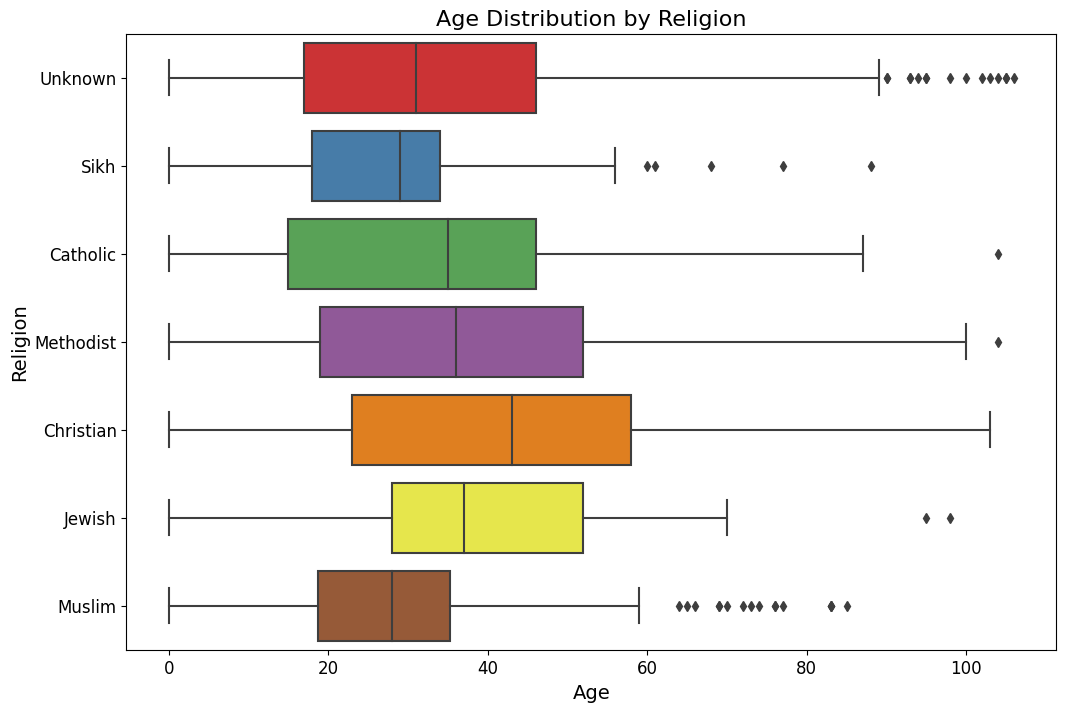

In [103]:
#Computing statistics
#aggregating statistics for 'Age' by 'Religion'
age_stats = census_df.groupby('Religion')['Age'].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'min', 'max']) 

#callculating the inter-quartile range (IQR)
age_stats['IQR'] = census_df.groupby('Religion')['Age'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))  
#printing a statement to indicate the age statistics by religion
print("Age Statistics by Religion:")  
#printing the age statistics
print(age_stats)  

#visualization: with Box Plot
plt.figure(figsize=(12, 8)) 
 # Creating box plot with Seaborn
sns.boxplot(x='Age', y='Religion', data=census_df, palette='Set1') 
plt.legend([],[], frameon=False)  #remove the legend
plt.title('Age Distribution by Religion', fontsize=16)

plt.xlabel('Age', fontsize=14) 
plt.ylabel('Religion', fontsize=14) 
plt.grid(False) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
#saving visualization
plt.savefig('Age_Distribution_by _Religion.png', format='png')
plt.show()  # Displaying the plot

## Analysis for adults adults who did not answer the question or are otherwise not identifiably religious.

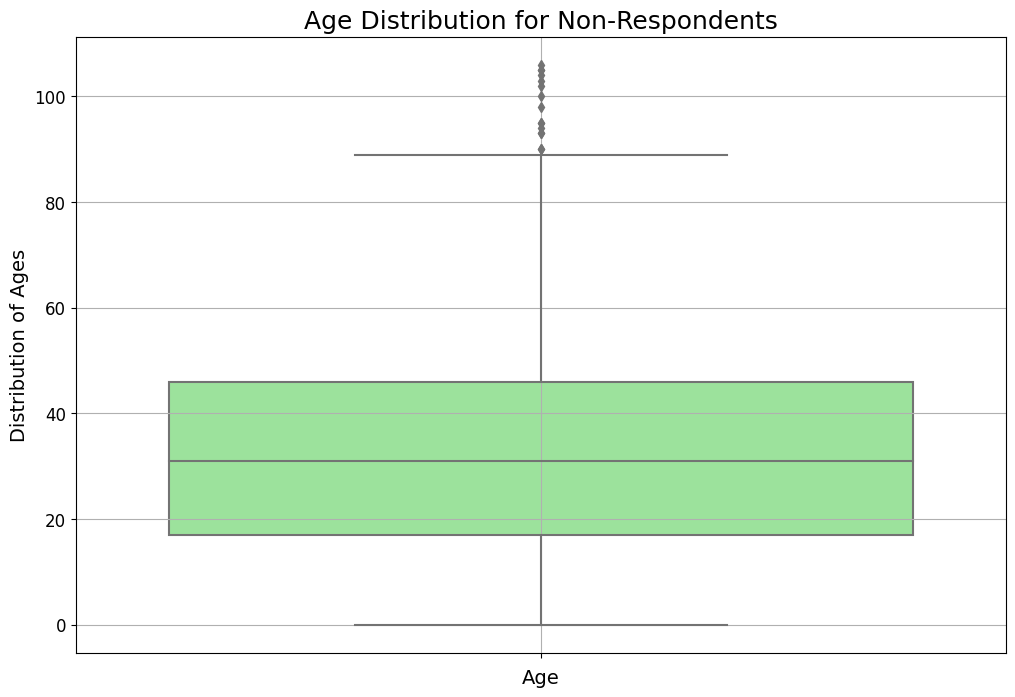

In [104]:
#filtering for 'Unknown' or missing religious affiliations
unknown_religion_df = census_df[census_df['Religion'] == 'Unknown']

#compute statistics for non-respondents
unknown_age_stats = unknown_religion_df['Age'].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'min', 'max'])#aggregating statistics for 'Age'  
#calculating the inter-quartile range (IQR)
unknown_age_stats['IQR'] = unknown_religion_df['Age'].quantile(0.75) - unknown_religion_df['Age'].quantile(0.25)

#visualization for box plot for Non-Respondents
plt.figure(figsize=(12, 8))  
sns.boxplot(data=unknown_religion_df, y='Age', color='lightgreen')  
plt.title('Age Distribution for Non-Respondents', fontsize=18) 
plt.xlabel('Age', fontsize=14)  
plt.ylabel('Distribution of Ages', fontsize=14)  
plt.grid(True) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 
#saving visualization
plt.savefig('Age Distribution for Non-Respondents.png', format='png')
plt.show()  # Displaying the plot

This box plot illustrates the age distribution of individuals who did not respond to the religion question. The median age of non-respondents is around 30 years, with most falling between the ages of 20 and 40, as indicated by the interquartile range (IQR). The whiskers extend to ages just over 60, showing the range within 1.5 times the IQR. The presence of outliers, represented by circles above the whiskers, indicates some non-respondents are significantly older, with ages extending into the 100s. This suggests a broad age range among those who chose not to disclose their religion.

## Projectiing 10years into the Future

Inheritance Rate Percentage by Religion:
Religion
Unknown      47.615528
Christian    25.534359
Catholic     14.856650
Methodist     8.724562
Muslim        2.276363
Sikh          0.628596
Jewish        0.363942
dtype: float64


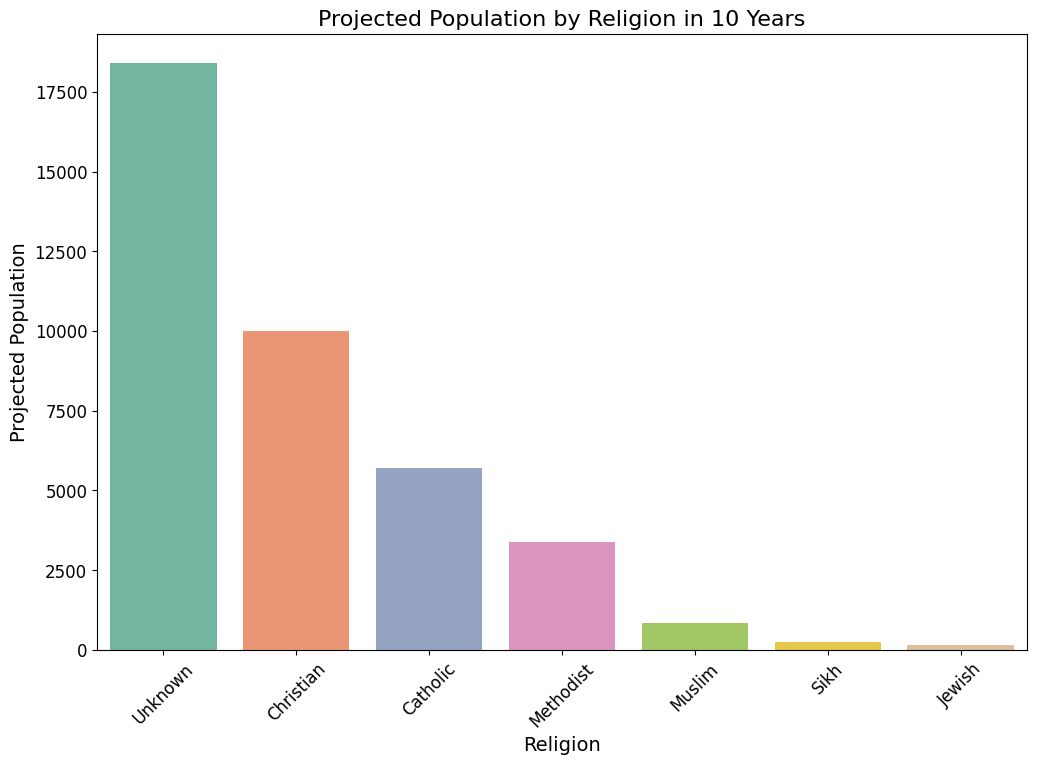

In [106]:
#computing inheritance rate by religion within households
inheritance_rate = census_df.groupby('House Number')['Religion'].value_counts(normalize=True).unstack().fillna(0)
inheritance_rate_percentage = inheritance_rate * 100

#aggregating data to get the mean inheritance rate per religion
inheritance_rate_mean = inheritance_rate_percentage.mean().sort_values(ascending=False)

#printing Inheritance Rate Percentage by Religion
print("Inheritance Rate Percentage by Religion:")
print(inheritance_rate_mean)

#current distribution of religious affiliations
current_distribution = census_df['Religion'].value_counts(normalize=True)

#projecting the number of births and deaths over the next 10 years
total_population = len(census_df)
births_over_10_years = (birth_rate_per_100000 / 100000) * total_population * 10
deaths_over_10_years = (death_rate_per_100000 / 100000) * total_population * 10

#applying inheritance rates to projected births
projected_births_by_religion = inheritance_rate_mean * births_over_10_years / 100

#projecting future population by religion (existing population minus deaths plus births)
future_population_by_religion = (current_distribution * total_population * (1 - death_rate / 100000) + projected_births_by_religion).sort_values(ascending=False)

#visualizing bar plot of Future Population by Religion with labels and ticks 
plt.figure(figsize=(12, 8))
sns.barplot(x=future_population_by_religion.index, y=future_population_by_religion.values, palette='Set2')
plt.legend([],[], frameon=False)  #removing the legend
plt.title('Projected Population by Religion in 10 Years', fontsize=16)
plt.xlabel('Religion', fontsize=14)
plt.ylabel('Projected Population', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
#saving and showing the plot 
plt.savefig('Projected Population by Religion in 10 Years.png', format='png')
plt.show()

## Esstimated births and deaths in 10 years

In [107]:
#population data
total_population = census_df.shape[0]  #calculating the total population

#calculating births and deaths over 10 years
births = (birth_rate_per_100000 / 1000000) * total_population * 10  #calculating the total births over 10 years
deaths = (death_rate_per_100000 / 1000000) * total_population * 10  #calculating the total deaths over 10 years

#printing the estimated births in 10 years and printing the estimated deaths in 10 years
print(f'Estimated births in 10 years: {births}')  
print(f'Estimated deaths in 10 years: {deaths}')  

Estimated births in 10 years: 2828.30479
Estimated deaths in 10 years: 9801.668342274981


## Estimated Future Religion Distribution
We will need to combine our knowledge of births and deaths with our findings about the religions 
of the population. 

Estimated Future Religion Distribution:
Religion
Unknown      1333.14663
Christian     751.63613
Catholic      408.95064
Methodist     247.48005
Muslim         51.93024
Sikh           19.74431
Jewish         15.41679
Name: proportion, dtype: float64


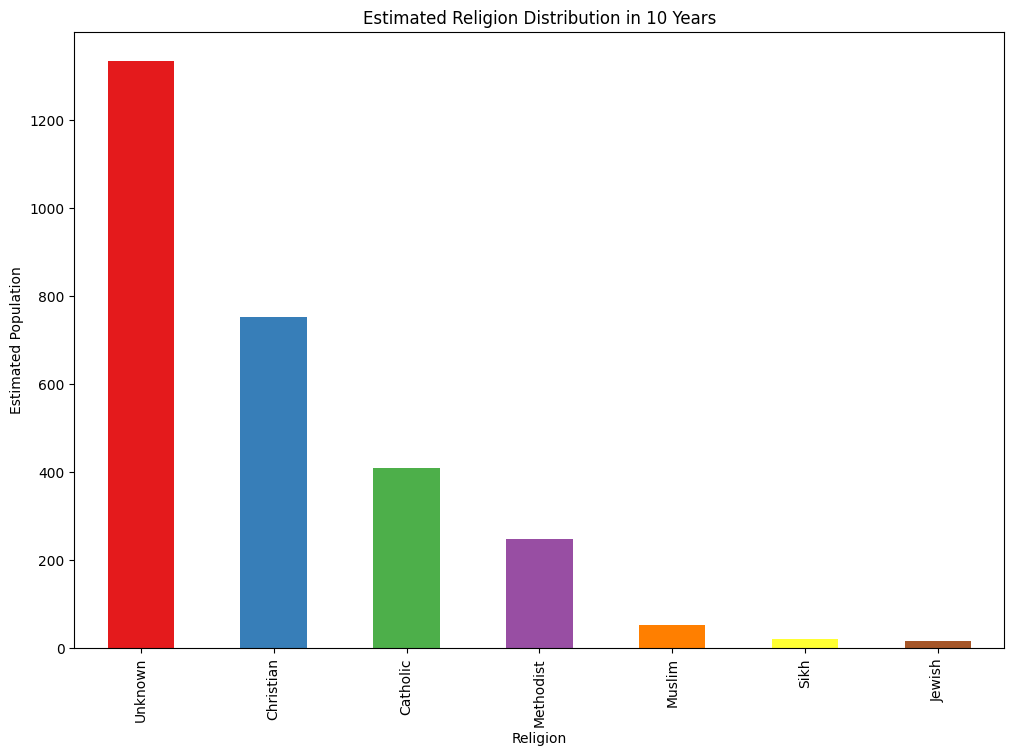

In [108]:
#estimate future population, say we have 
future_population = total_population + births - deaths 

#assuming the inheritance rates can help estimate future religion distribution
current_religion_distribution = census_df['Religion'].value_counts(normalize=True)  #calculating the current religion distribution
future_religion_distribution = current_religion_distribution * births  #estimating the future religion distribution based on births

#pinting a statement to indicate the estimated future religion distribution
print("Estimated Future Religion Distribution:") 
#printing the estimated future religion distribution Series
print(future_religion_distribution)  

#setting a color palette from Seaborn
colors = sns.color_palette("Set1", len(future_religion_distribution))

#Visualizing future Religion Distribution with added colors with bar chart
future_religion_distribution.plot(kind='bar', figsize=(12, 8), color=colors)

#lables
plt.title('Estimated Religion Distribution in 10 Years')  
plt.xlabel('Religion')
plt.ylabel('Estimated Population') 

#saving and showing the plot    
plt.savefig('Estimated Religion Distribution in 10 Years.png', format='png')
plt.show()



## Anticipating Future Medical Needs

In [109]:
#percentage of population over 80
over_80 = census_df[census_df['Age'] > 80].shape[0]  #counting the number of people over 80
total_population = census_df.shape[0]  #calculating the total population

fraction_over_80 = (over_80 / total_population) * 100  #calculating the fraction of the population over 80
print(f'Fraction of over-80s: {fraction_over_80:.2f}%')  #printing the fraction of the population over 80

#using birth and death rates (per 1000 per year) computed earlier 
#project the number of births and deaths over the next 10 years
births_over_10_years = (birth_rate_per_100000 / 1000000) * total_population * 10
deaths_over_10_years = (death_rate_per_100000 / 1000000) * total_population * 10

#estimating future population over 80
current_age_distribution = census_df['Age'].value_counts(normalize=True)
new_over_80s = total_population * current_age_distribution.loc[70:79].sum() * 0.1  #people who will turn 80
future_over_80 = over_80 - deaths_over_10_years * (over_80 / total_population) + new_over_80s  #adjustment for deaths and new over-80s
future_fraction_over_80 = (future_over_80 / total_population) * 100 #percentage computation of future_fraction_over_80

print(f'Estimated over-80s in 10 years: {future_over_80:.0f}')
print(f'Future fraction of over-80s: {future_fraction_over_80:.2f}%')

#accessing the overall health and medical needs of the population
elderly_population = census_df[census_df['Age'] >= 65].shape[0]
fraction_elderly = (elderly_population / total_population) * 100

#accessing the prevalence of infirmities
infirmity_counts = census_df['Infirmity'].value_counts()
print("Infirmity counts:")
print(infirmity_counts)

#calculating fraction of the population with infirmities
fraction_with_infirmities = (census_df[census_df['Infirmity'] != 'None'].shape[0] / total_population) * 100

print(f'Current fraction of elderly (65+): {fraction_elderly:.2f}%')
print(f'Fraction of the population with infirmities: {fraction_with_infirmities:.2f}%')

#summary of findings, printing fraction_over_80, future_fraction_over_80, fraction_elderly and fraction_with_infirmities
print()
print(f"The current fraction of the population over 80 is {fraction_over_80:.2f}%.")
print(f"In 10 years, the fraction of the population over 80 is expected to change to {future_fraction_over_80:.2f}%.")
print(f"The current fraction of the population aged 65 and over is {fraction_elderly:.2f}%.")
print(f"The fraction of the population with infirmities is {fraction_with_infirmities:.2f}%.")

#the implications for medical needs
if future_fraction_over_80 > fraction_over_80:
    print("The population is aging, which will likely increase the demand for medical care and long-term care services.")
else:
    print("The fraction of the population over 80 is not expected to increase significantly, suggesting a stable demand for medical care.")

#birth rate projection
expected_births_10_years = births_over_10_years
print(f'Expected number of births in the next 10 years: {expected_births_10_years:.0f}')


Fraction of over-80s: 2.12%
Estimated over-80s in 10 years: 94
Future fraction of over-80s: 0.89%
Infirmity counts:
Infirmity
Not Specified          10377
Physical Disability       28
Mental Disability         16
Deaf                      12
Disabled                   8
Unknown Infection          8
Blind                      8
Name: count, dtype: int64
Current fraction of elderly (65+): 9.25%
Fraction of the population with infirmities: 100.00%

The current fraction of the population over 80 is 2.12%.
In 10 years, the fraction of the population over 80 is expected to change to 0.89%.
The current fraction of the population aged 65 and over is 9.25%.
The fraction of the population with infirmities is 100.00%.
The fraction of the population over 80 is not expected to increase significantly, suggesting a stable demand for medical care.
Expected number of births in the next 10 years: 2828


## Hypothesis Testing for Healthy Population

In [110]:
from scipy.stats import chisquare
import numpy as np

#total population counts
total_population = len(census_df)

#from percentage infirmity
healthy_count = 0.9923 * total_population

#difference between total_population and healthy_count
unhealthy_count = total_population - healthy_count

#observed array for test
observed = np.array([healthy_count, unhealthy_count])

#expected counts under the null hypothesis (98% are healthy as acoording to Public Health England (2022))
expected_healthy = 0.98 * total_population
expected_unhealthy = 0.02 * total_population
#expected array for test
expected = np.array([expected_healthy, expected_unhealthy])

#performing chi-square test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

#output the results
print(f"Chi2 Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

#decision based on the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the proportion of healthy individuals.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the proportion of healthy individuals.")


Chi2 Statistic: 80.7163
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the proportion of healthy individuals.


The hypothesis test revealed that the proportion of healthy individuals in the town is significantly higher than the expected 98%, with a p-value indicating a strong likelihood that the town's population is indeed healthier than average, showing that the town's population is in good health.

In [111]:
#checking occupation unique values and converting into a list for easier viewing
unique_occupation = census_df['Occupation'].unique().tolist()

#displaying unique occupations
print(unique_occupation)

['Retired Engineering geologist', 'Environmental consultant', 'Scientist, physiological', 'Student', 'Bonds trader', 'Retired Programmer, applications', 'Retired Neurosurgeon', 'Child', 'Engineer, aeronautical', 'Unemployed', 'Magazine features editor', 'Restaurant manager', 'University Student', 'Environmental health practitioner', 'Ship broker', 'Designer, graphic', 'Water quality scientist', 'Runner, broadcasting/film/video', 'Museum education officer', 'Retired Museum education officer', 'Retired Chemical engineer', 'Arboriculturist', 'Systems analyst', 'Brewing technologist', 'Museum/gallery conservator', 'Field seismologist', 'Special educational needs teacher', 'Media buyer', 'Retired Drilling engineer', 'Retired International aid/development worker', 'Tourism officer', 'Forensic psychologist', 'Osteopath', 'Dietitian', 'Building control surveyor', 'Teacher, secondary school', 'Television production assistant', 'Lawyer', 'Electrical engineer', 'Hydrologist', 'Librarian, public',

In [112]:
#Fetching unique occupations and their counts
occupation_counts = census_df['Occupation'].value_counts()

#display unique occupations with their counts
print(occupation_counts)

Occupation
Student                                         2127
University Student                               669
Unemployed                                       632
Child                                            609
PhD Student                                       29
                                                ... 
Retired Accommodation manager                      1
Retired Control and instrumentation engineer       1
Retired Psychologist, counselling                  1
Retired Rural practice surveyor                    1
Retired Water quality scientist                    1
Name: count, Length: 1086, dtype: int64


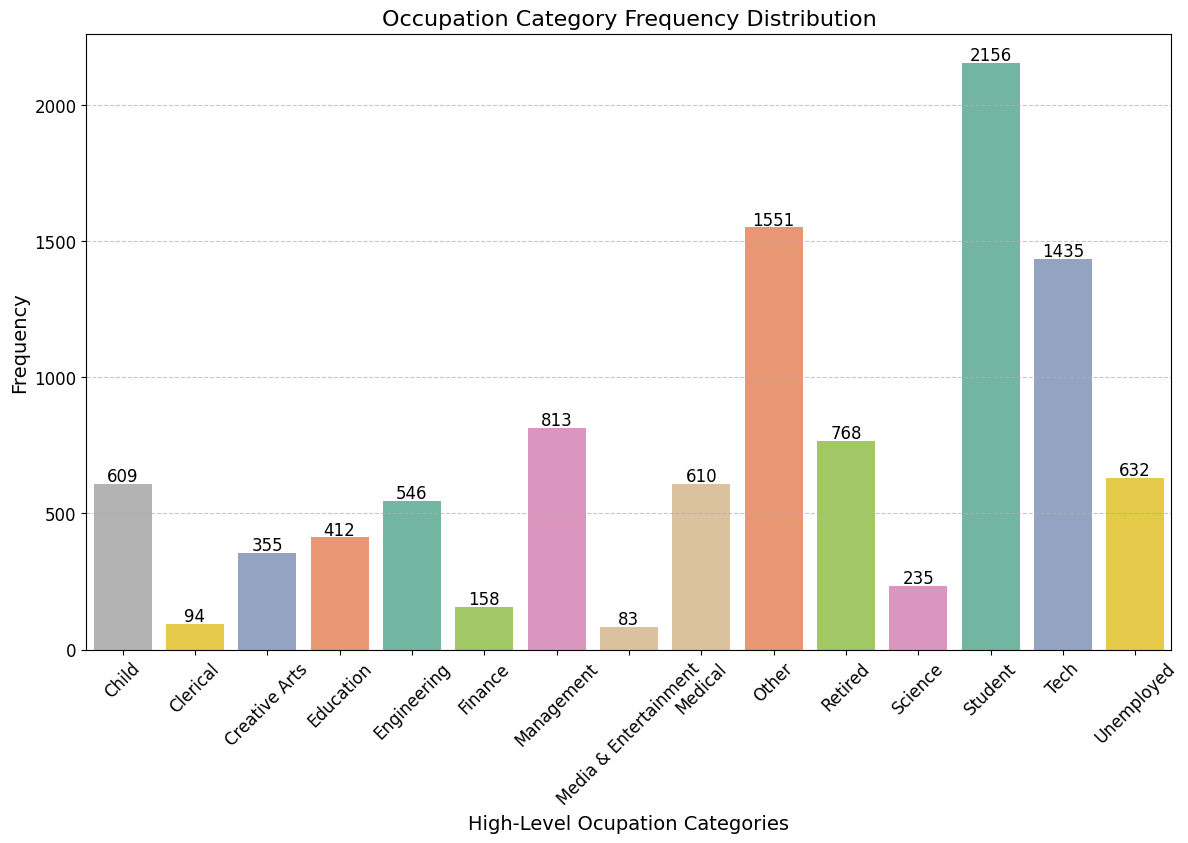

In [113]:
#creating a high-level occupation categories and their keywords after viewing all ocupations 
occupation_categories = {
    'Retired': ['retired'],
    'Medical': ['doctor', 'nurse', 'pharmacist', 'therapist', 'clinical', 'medical', 'dentist', 'physician', 'surgeon', 'optometrist', 'podiatrist'],
    'Education': ['teacher', 'professor', 'educator', 'lecturer', 'trainer', 'education', 'administrator'],
    'Engineering': ['engineer', 'engineering'],
    'Tech': ['developer', 'programmer', 'it', 'software', 'tech', 'systems', 'applications'],
    'Unemployed': ['unemployed'],
    'Student': ['student'],
    'Clerical': ['clerk', 'administrative', 'secretary', 'assistant'],
    'Creative Arts': ['designer', 'artist', 'writer', 'editor', 'photographer', 'musician', 'actor', 'dancer', 'film', 'video', 'media'],
    'Science': ['scientist', 'biochemist', 'geneticist', 'researcher'],
    'Management': ['manager', 'chief', 'executive', 'director', 'officer'],
    'Finance': ['accountant', 'financial', 'banker', 'economist'],
    'Media & Entertainment': ['journalist', 'broadcaster', 'presenter', 'producer', 'media', 'entertainment'],
    'Child': ['child'],
    'Other': []
}

#function to categorize occupation
def categorize_occupation(occupation):
    occupation = occupation.lower()
    for category, keywords in occupation_categories.items():
        if any(keyword in occupation for keyword in keywords):
            return category
    return 'Other'

#applying categorize_occupation to create a new column for high-level occupation categories
census_df['Occupation Category'] = census_df['Occupation'].apply(categorize_occupation)

# Count the occurrences of each category
occupation_counts = census_df['Occupation Category'].value_counts().reset_index()
occupation_counts.columns = ['Occupation Category', 'Count']

#setting the order of categories explicitly
category_order = sorted(occupation_counts['Occupation Category'])

#plloting data
plt.figure(figsize=(14, 8))
sns.barplot(x='Occupation Category', y='Count', data=occupation_counts, palette='Set2', order=category_order, hue='Occupation Category', dodge=False)
plt.legend([],[], frameon=False)  #removing the legend whenever hue is set

plt.title('Occupation Category Frequency Distribution', fontsize=16)
plt.xlabel('High-Level Ocupation Categories', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

#looping and adding data labels
for index, row in occupation_counts.iterrows():
    plt.text(category_order.index(row['Occupation Category']), row['Count'] + 10, str(row['Count']), color='black', ha="center", fontsize=12)
#saving visualization and showinf it    
plt.savefig('Occupation_Category_Frequency_Distribution.png', format='png')
plt.show()

## Unemployment Rate

In [114]:
#calculating the Unemployment Rate
unemployed_people = census_df.loc[census_df['Occupation'] == 'Unemployed']
total_unemployed = len(unemployed_people)

#getting the labout force
labour_force = census_df.loc[
    (census_df['Age'] >= 16) & #Based on GOV.UK
    (census_df['Occupation Category'] != 'Retired')
]
total_labour_force = len(labour_force)

unemployment_rate = round((total_unemployed / total_labour_force) * 100, 2)
print(f'Unemployment rate: {unemployment_rate}%')

#Gtting the Modal Age Group among the Unemployed
modal_unemployment_age_group = unemployed_people['Age Group'].mode().iloc[0]
modal_frequency = unemployed_people['Age Group'].value_counts().max()
percentage_of_total = round((modal_frequency / total_unemployed) * 100, 2)

#printing the modal age group information
print(f'Modal unemployment age group: {modal_unemployment_age_group}')
print(f'Frequency: {modal_frequency}')
print(f'Modal Percentage: {percentage_of_total}%')

Unemployment rate: 8.45%
Modal unemployment age group: 40-44
Frequency: 96
Modal Percentage: 15.19%


##  Unemployment distribution across the various age groups

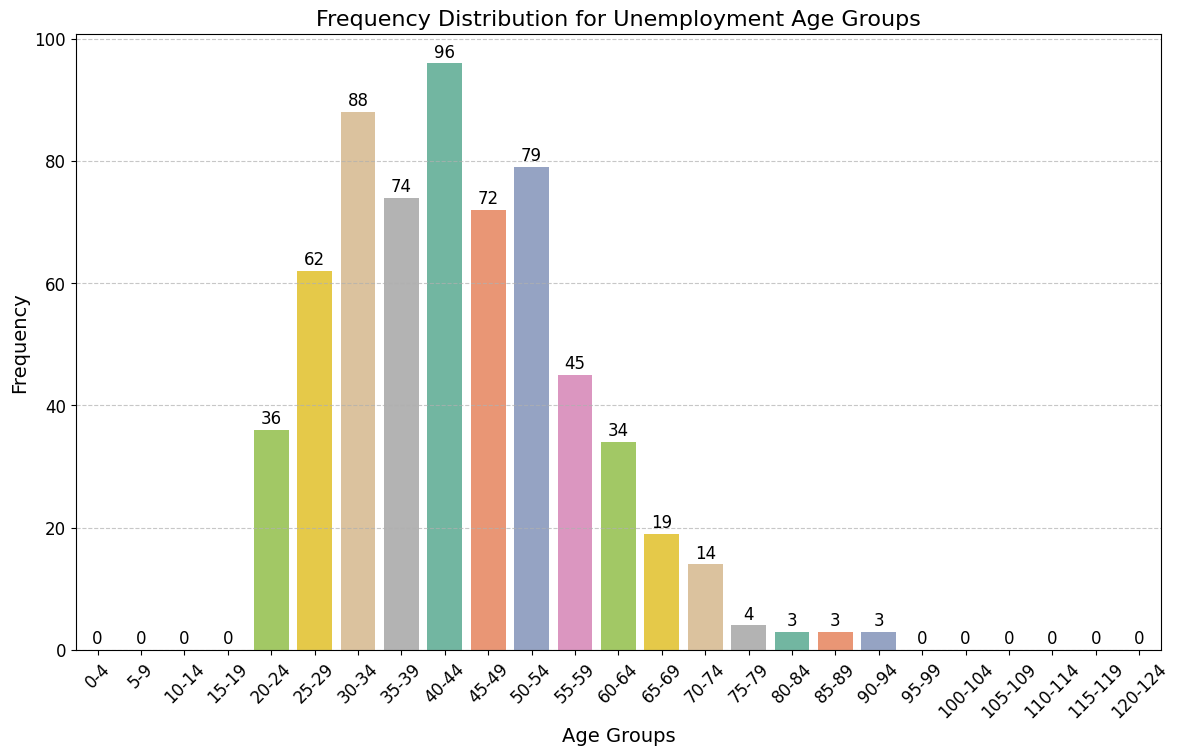

In [119]:
#calculating frequency distribution of unemployed individuals across different age groups
unemployed_people = census_df.loc[census_df['Occupation'] == 'Unemployed']
age_group_distribution = unemployed_people['Age Group'].value_counts().sort_index()

#creating a bar plot to visualize the distribution
plt.figure(figsize=(14, 8))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette='Set2')
plt.legend([],[], frameon=False)  #remove the legend

#adding the title and labels
plt.title('Frequency Distribution for Unemployment Age Groups', fontsize=16)
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

#adding data labels on top of each bar and specifying parameters 
for index, value in enumerate(age_group_distribution.values):
    plt.text(index, value + 1, str(value), color='black', ha="center", fontsize=12)
#saving plot    
plt.savefig('Frequency Distribution for Unemployment Age Groups.png', format='png')
#show the plot
plt.show()

## Hypothesis Testing for Gender Representation in Occupations

In [120]:
#importing chi2_contingency from scipy.stats for Hypothesis Testing
from scipy.stats import chi2_contingency

#variable assignment for law occupation
law_occupation = 'Lawyer'

#filtering Engineer occupation
occupation_data = census_df[census_df['Occupation'] == law_occupation]

#gender_counts for Engineer occupation
gender_counts = occupation_data['Gender'].value_counts()

#observed data as a contingency table
observed = np.array([gender_counts.get('Male', 0), gender_counts.get('Female', 0)])

#expected data under the null hypothesis (equal proportions)
total = sum(observed)
expected = np.array([total / 2, total / 2])  # assuming equal distribution

#creating a 2D contingency table
contingency_table = np.array([observed, expected])

#Chi-square test
chi2_stat, p_value, dof, _ = chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2_stat}, P-value: {p_value}")

#Null Hypothesis (H0): The proportion of males and females in the occupation is the same.
#Alternative Hypothesis (H1): The proportion of males and females in the occupation is different
if p_value < 0.05:
    print(f"Reject the null hypothesis: There is a significant difference in gender representation for {law_occupation}.")
else:
    print(f"Fail to reject the null hypothesis: No significant difference in gender representation for {law_occupation}.")


Chi2 Stat: 0.04631578947368421, P-value: 0.82960278801799
Fail to reject the null hypothesis: No significant difference in gender representation for Lawyer.


## Marriage and Divorce Rates

In [121]:
#calculating Marriage and Divorce Rates
num_adults = len(census_df[census_df['Age'] > 18])
num_married = len(census_df[census_df['Marital Status'] == 'Married'])
num_divorced = len(census_df[census_df['Marital Status'] == 'Divorced'])

#calculating Marriage and Divorce percentages
marriage_rate = (num_married / num_adults) * 100
divorce_rate = (num_divorced / num_adults) * 100

#prinfing marriage and Divorce rate percentages
print(f'Marriage Rate: {marriage_rate:.2f}%')
print(f'Divorce Rate: {divorce_rate:.2f}%')


Marriage Rate: 36.70%
Divorce Rate: 12.25%


## Marital Status by Age Group

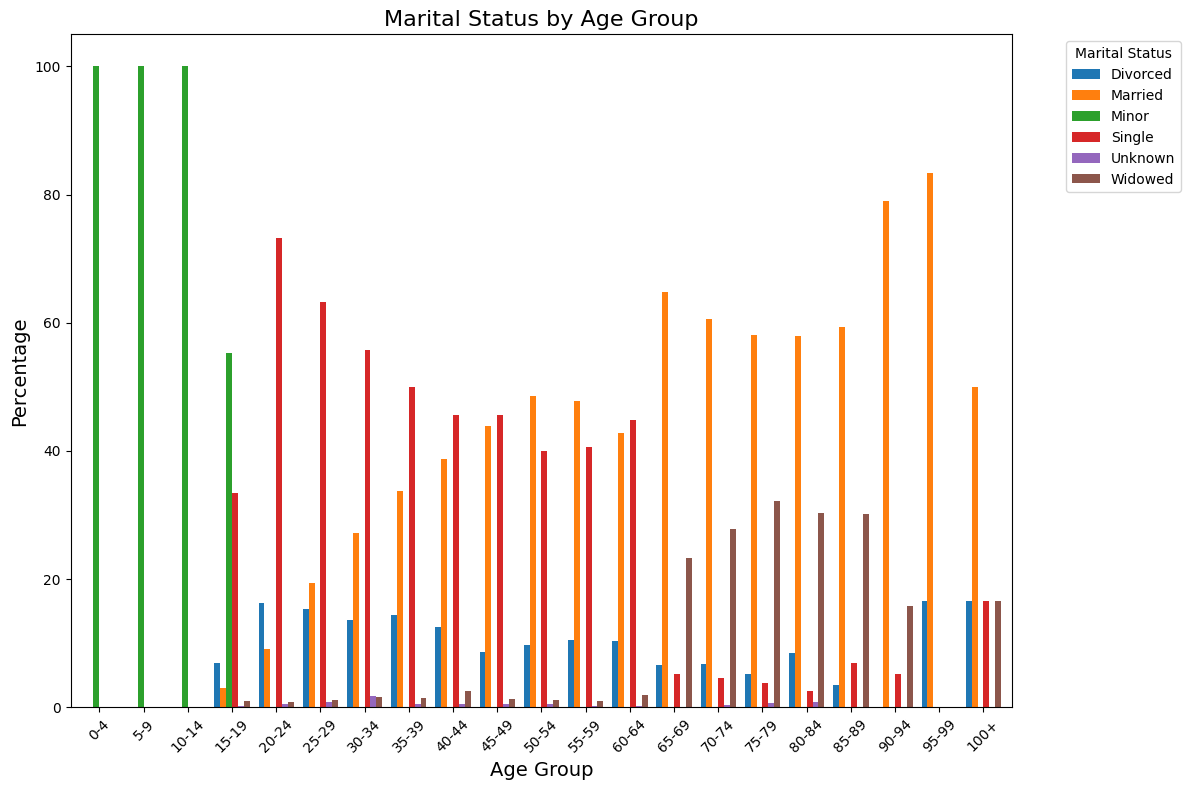

In [122]:
#age bins and labels
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, float('inf')]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', 
          '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', 
          '75-79', '80-84', '85-89', '90-94', '95-99', '100+']

#creating a new column for age groups
census_df['Age Group'] = pd.cut(census_df['Age'], bins=bins, labels=labels, right=False)

#calculatingpercentage of each marital status within each age group
marital_status_distribution = census_df.groupby(['Age Group', 'Marital Status'], observed=False).size().reset_index(name='Count')
total_counts = census_df.groupby(['Age Group'], observed=False).size().reset_index(name='Total') #geting the total counts 
marital_status_distribution = marital_status_distribution.merge(total_counts, on='Age Group') #gettting the marital status distribution
marital_status_distribution['Percentage'] = (marital_status_distribution['Count'] / marital_status_distribution['Total']) * 100 #gettting marital status distribution percentage 

#ppivoting the data to prepare it for Seaborn
pivot_df = marital_status_distribution.pivot(index='Age Group', columns='Marital Status', values='Percentage')

#plotting the data using Seaborn
ax = pivot_df.plot(kind='bar', stacked=False, figsize=(12, 8), width=0.8)

#labels and title on the plot with fontsize and rotation
plt.title('Marital Status by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)

#adjusting the legend position
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

#saveing the plot to a file
plt.savefig('marital_status_by_age.png', format='png', dpi=300, bbox_inches='tight')

#show plot
plt.show()


## Hypothesis Testing for Marital Status by Age Group


In [123]:
#creating a contingency table
contingency_table = pd.crosstab(census_df['Age Group'], census_df['Marital Status'])

#performing Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2_stat}, P-value: {p_value}")

#Null Hypothesis (H0): Marital status is independent of age group.
#Alternative Hypothesis (H1): Marital status is dependent on age group.
if p_value < 0.05:
    print("Reject the null hypothesis: Marital status is dependent on age group.")
else:
    print("Fail to reject the null hypothesis: Marital status is independent of age group.")


Chi2 Stat: 12519.317806913185, P-value: 0.0
Reject the null hypothesis: Marital status is dependent on age group.


##  University Students and other Potential Commuter-Intensive Professions 
In addition to university students, several professions typically require commuting due to the nature of the work. These include occupations in sectors such as education, healthcare, IT, engineering, finance, and other specialized fields that often necessitate travel to urban centers or specific facilities. For this analysis, professions like lecturers, engineers, IT professionals, healthcare workers, and financial advisors have been selected because they commonly work in environments not available within smaller towns, thus requiring commuting. Additionally, any occupations containing the keyword "retired" are excluded from this analysis, as these individuals are no longer active in the workforce and are unlikely to commute. Similarly, children and individuals who are unemployed are not considered in the commuter analysis, as they do not engage in work or study that would necessitate regular travel. Furthermore, students who are not university students but attend schools that are not universities within the town may also need to commute. By focusing on these selected professions and categories, the analysis aims to accurately estimate the number of potential commuters, which is essential for assessing the town's infrastructure needs, particularly in terms of transportation.

In [124]:
#In the context of the  project, the town does not have a University, so the population with occupations such
#as 'Lecturer, higher education' and 'University Student' usually leave the town and are commutters. 
#Other occupations may also apply as commuters but this percentage/fraction holds more water.
commuters = census_df[(census_df['Occupation'] == 'Lecturer, higher education') | (census_df['Occupation'] == 'University Student')]
commuters

,Serial Number,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group,Occupation Category
18,3708,1,Spider Avenue,Molly,Austin,21,Daughter,Single,Female,University Student,Not Specified,Unknown,20-24,Tech
22,4190,1,Lichfield Pass,Eleanor,Baker,19,Head,Married,Female,University Student,Not Specified,Methodist,15-19,Tech
23,4191,1,Lichfield Pass,Lawrence,Baker,19,Husband,Married,Male,University Student,Not Specified,Unknown,15-19,Tech
26,10405,1,Guinevere Tower,Debra,Ball,19,Daughter,Single,Female,University Student,Not Specified,Catholic,15-19,Tech
38,4746,1,February Lodge,Tracy,Barnes,21,Daughter,Single,Female,University Student,Not Specified,Unknown,20-24,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10429,6559,230,Strawberry Lights,Ben,Gray,21,Head,Single,Male,University Student,Not Specified,Unknown,20-24,Tech
10431,6561,230,Strawberry Lights,Gerald,Thomas,19,Head,Single,Male,University Student,Not Specified,Unknown,15-19,Tech
10434,6564,231,Strawberry Lights,Dale,Booth,19,Husband,Married,Male,University Student,Not Specified,Unknown,15-19,Tech
10435,6563,231,Strawberry Lights,Rebecca,Booth,21,Head,Married,Female,University Student,Not Specified,Unknown,20-24,Tech


In [125]:
#counting number of university students (commuters)
university_students = census_df[census_df['Occupation'].str.contains('University Student', case=False, na=False)]
num_university_students = len(university_students)

#other commuter-intensive professions or individuals 
commuter_professions = [
    'Doctor', 'Nurse', 'Lecturer', 'Teacher', 'Engineer', 'Student', 'Lecturer, higher education',
    'Civil Engineer', 'Mechanical Engineer', 'Electrical Engineer', 
    'IT Professional', 'Accountant', 'Lawyer', 'Financial Analyst', 'Consultant', 
    'Architect', 'Marketing Manager', 'Business Analyst', 'Journalist', 'Media Planner',
    'Designer', 'CEO', 'CFO', 'COO', 'Scientist', 'Environmental Consultant', 
    'Museum Education Officer', 'Systems Analyst'
]

#filtering out potential commuters based on professions
potential_commuters = census_df[census_df['Occupation'].str.contains('|'.join(commuter_professions), case=False, na=False)]
num_potential_commuters = len(potential_commuters)

#total commuters (university students + potential other commuters)
total_commuters = num_university_students + num_potential_commuters
total_population = len(census_df)

#calculaing percentage of potential commuters
percentage_commuters = (total_commuters / total_population) * 100

#printing the results
print(f'Number of University Students (Commuters): {num_university_students}')
print(f'Number of Other Potential Commuters: {num_potential_commuters}')
print(f'Total Number of Potential Commuters: {total_commuters}')
print(f'Total Population: {total_population}')
print(f'Percentage of Potential Commuters: {percentage_commuters:.2f}%')

Number of University Students (Commuters): 669
Number of Other Potential Commuters: 4615
Total Number of Potential Commuters: 5284
Total Population: 10457
Percentage of Potential Commuters: 50.53%


## Affluent Population and Demand for Large Family Housing

In [126]:
high_paying_jobs = [
    'Accountant, chartered', 'Accountant, chartered certified', 'Accountant, chartered public finance', 
    'Actuary', 'Advertising account executive', 'Advertising art director', 'Airline pilot', 'Architect', 
    'Banker', 'Barrister', 'Biochemical engineer', 'Biomedical scientist', 'Broadcast engineer', 'Chief Executive Officer', 
    'Chief Financial Officer', 'Chief Operating Officer', 'Chief Strategy Officer', 'Chief Technology Officer', 
    'Civil engineer, consulting', 'Clinical embryologist', 'Clinical molecular geneticist', 'Consulting civil engineer', 
    'Data scientist', 'Dentist', 'Doctor, general practice', 'Doctor, hospital', 'Editor, commissioning', 
    'Engineer, biomedical', 'Engineer, chemical', 'Engineer, civil (consulting)', 'Engineer, civil (contracting)', 
    'Engineer, control and instrumentation', 'Engineer, drilling', 'Engineer, electrical', 'Engineer, energy', 
    'Engineer, land', 'Engineer, manufacturing', 'Engineer, mechanical', 'Engineer, petroleum', 'Engineer, production', 
    'Engineer, structural', 'Financial adviser', 'Financial controller', 'Financial manager', 'Financial risk analyst', 
    'Financial trader', 'Geophysicist', 'Hydrogeologist', 'Industrial buyer', 'Industrial/product designer', 
    'Information systems manager', 'IT consultant', 'IT sales professional', 'IT trainer', 'Journalist, broadcasting', 
    'Journalist, magazine', 'Journalist, newspaper', 'Lawyer', 'Management consultant', 'Marketing executive', 
    'Medical laboratory scientific officer', 'Medical physicist', 'Merchant navy officer', 'Metallurgist', 
    'Neurosurgeon', 'Nurse', 'Operational researcher', 'Optician, dispensing', 'Patent attorney', 'Pensions consultant', 'Pharmacist, community', 
    'Pharmacist, hospital', 'Physicist, medical', 'Pilot, airline', 'Production manager', 'Programmer, multimedia', 
    'Programmer, systems', 'Project manager', 'Public relations officer', 'Quantity surveyor', 'Radiation protection practitioner', 
    'Radiographer, diagnostic', 'Radiographer, therapeutic', 'Research scientist', 'Retail buyer', 'Sales executive', 
    'Sales promotion account executive', 'Scientist, audiological', 'Scientist, biomedical', 'Scientist, clinical', 
    'Scientist, forensic', 'Scientist, marine', 'Scientist, physiological', 'Scientist, research (life sciences)', 
    'Scientist, research (maths)', 'Scientist, research (medical)', 'Scientist, research (physical sciences)', 
    'Software engineer', 'Solicitor', 'Statistician', 'Surveyor, building control', 'Surveyor, commercial/residential', 
    'Surveyor, land/geomatics', 'Surveyor, minerals', 'Tax inspector', 'Teacher, higher education', 'Teacher, secondary school', 
    'Veterinary surgeon'
]

#filtering for high-paying jobs
high_paying_professionals = census_df[census_df['Occupation'].isin(high_paying_jobs)]
total_population = len(census_df)
affluent_population = len(high_paying_professionals)

#calculating the percentage of affluent population
affluence_percentage = (affluent_population / total_population) * 100
print(f'Percentage of population in high-paying jobs: {affluence_percentage:.2f}%')

#analyze Household Sizes and Calculating household sizes
household_sizes = census_df.groupby(['House Number', 'Street']).size().reset_index(name='Household Size')

#calculating the distribution of household sizes
households_up_to_4_people = household_sizes[household_sizes['Household Size'] <= 4]
percentage_households_up_to_4 = (len(households_up_to_4_people) / len(household_sizes)) * 100
#getting population_in_households_up_to_4 and percentage_population_in_households_up_to_4
population_in_households_up_to_4 = households_up_to_4_people['Household Size'].sum()
percentage_population_in_households_up_to_4 = (population_in_households_up_to_4 / total_population) * 100

#printing households with up to 4 people and population in households with up to 4 people
print(f'Percentage of households with up to 4 people: {percentage_households_up_to_4:.2f}%')
print(f'Percentage of population in households with up to 4 people: {percentage_population_in_households_up_to_4:.2f}%')

#combining the Analysis
if affluence_percentage > 50:  #with assuming more than 50% in high-paying jobs indicates affluence
    if percentage_households_up_to_4 > 70:  # Assuming more than 70% households up to 4 indicates low demand for large family housing
        print("The population is affluent, but there is no significant demand for large family housing.")
    else:
        print("The population is affluent and there may be demand for large family housing.")
else:
    print("The population is not affluent enough to consider large family housing.")

#print affluence_summary 
affluence_summary = f"The population is {affluence_percentage:.2f}% affluent, with high-paying jobs. However, {percentage_households_up_to_4:.2f}% of the households have up to 4 people, housing {percentage_population_in_households_up_to_4:.2f}% of the population. Therefore, the option of large family housing will be eliminated."
print(affluence_summary)



Percentage of population in high-paying jobs: 8.22%
Percentage of households with up to 4 people: 80.09%
Percentage of population in households with up to 4 people: 60.73%
The population is not affluent enough to consider large family housing.
The population is 8.22% affluent, with high-paying jobs. However, 80.09% of the households have up to 4 people, housing 60.73% of the population. Therefore, the option of large family housing will be eliminated.


## Decision on train station

In [127]:
#Computing a decision on building a train station based on earlier percentage commuters value.
if percentage_commuters > 40: #setting 40 as threshold
    train_station_option = " Keep the option of building a train station due to the significant proportion of commuters."
else:
    train_station_option = "Consider other options as the proportion of commuters is not substantial."
    
print(train_station_option)


 Keep the option of building a train station due to the significant proportion of commuters.


## Decision on Religious Building 


In [128]:
#calculating proportion of the population practicing different religions
religion_counts = census_df['Religion'].value_counts(normalize=True) * 100

#excluding equivalent values indicating no religion
religion_counts = religion_counts[religion_counts.index != 'None']

print("Proportion of the population practicing each religion:")
print(religion_counts)


Proportion of the population practicing each religion:
Religion
Unknown      47.135890
Christian    26.575500
Catholic     14.459214
Methodist     8.750120
Muslim        1.836091
Sikh          0.698097
Jewish        0.545089
Name: proportion, dtype: float64


In [129]:
#focus on specific religions, e.g., Christians and Catholics since they are the two highest from teh graph over unknown religions 
christians_percentage = religion_counts.get('Christian', 0)
catholics_percentage = religion_counts.get('Catholic', 0)

print(f"Percentage of Christians: {christians_percentage}%")
print(f"Percentage of Catholics: {catholics_percentage}%")


Percentage of Christians: 26.575499665295975%
Percentage of Catholics: 14.459213923687484%


## Emergency Medical Building 

In [130]:
#calculating Population Growth with birth_rate_per_100000 and death_rate_per_100000
natural_rate_of_increase = birth_rate_per_100000 - death_rate_per_100000
population_growth_rate = natural_rate_of_increase  # Keep it per 100,000

#analyzing disability rates
disability_data = census_df['Infirmity'].value_counts(normalize=True) * 100
#asssuming 'Not Specified' or 'Unknown' indicates no disability
no_disability_rate = disability_data.get('Not Specified', 0) + disability_data.get('Unknown', 0) 
disability_rate = 100 - no_disability_rate
  
#analyzing birth rates
total_population = len(census_df)
expected_births = (birth_rate_per_100000 / 100000) * total_population

#summarizing findings
print(f"Natural Rate of Increase per 100,000: {population_growth_rate:.2f}")
print(f"Disability Rate: {disability_rate:.2f}%")
print(f"Expected Births: {expected_births:.0f}")

#checking to decide  on findings
if population_growth_rate < 0 and disability_rate < 1:
    print("The population is not experiencing significant growth, and the disability rate is very low. Therefore, the option for an emergency medical building will be eliminated.")
else:
    print("There may be a need for an emergency medical building based on the current data.")

Natural Rate of Increase per 100,000: -66686.08
Disability Rate: 0.77%
Expected Births: 2828
The population is not experiencing significant growth, and the disability rate is very low. Therefore, the option for an emergency medical building will be eliminated.


## Recommedation - What should be built on an unoccupied plot of land that the local government wishes to develop?

While a place of worship for 26.57% of Christians could strengthen community ties, building a train station would benefit 50.53% of potential daily commuters, addressing broader transportation needs. Thus, the train station should be prioritized. High-density and low-density housing are not required due to low population growth and minimal demand for larger homes, current medical facilities are adequate given the low birth and disability rates. 


## Employment and training

In [131]:
#define the working age range (typically 16-65, but can vary based on GOV.UK and ONS (Office of National Statistics ))
working_age_min = 16
working_age_max = 65

#filtering the census data to include only the working-age population
working_age_population = census_df[(census_df['Age'] >= working_age_min) & (census_df['Age'] <= working_age_max)]

#clculating the number of unemployed individuals within the working-age population
num_unemployed = working_age_population[working_age_population['Occupation'] == 'Unemployed'].shape[0]

#calculating the total labor force (employed + unemployed)
labor_force = working_age_population[working_age_population['Occupation'] != 'Child'].shape[0]

#calculate the unemployment rate based on findings from GOV.UK and ONS
unemployment_rate = (num_unemployed / labor_force) * 100
print(f'Unemployment Rate: {unemployment_rate:.2f}%')

#making recommendations based on the analysis
if unemployment_rate > 5: #based on findings from GOV.UK and ONS 
    recommendation = "Invest in employment and training programs to reduce the high unemployment rate of {:.2f}%.".format(unemployment_rate)
else:
    recommendation = "Unemployment is not a major issue with a rate of {:.2f}%. Consider other investment options.".format(unemployment_rate)

print(recommendation)

#final statementfor a decision
final_statement = f"""
Based on the analysis of the town's demographic data, it is recommended to invest in employment and training programs. The town has a high unemployment rate of {unemployment_rate:.2f}%, indicating a need for initiatives to boost employment. Other options such as infrastructure and healthcare were considered but the high unemployment rate makes employment and training the priority.
"""
print(final_statement)



Unemployment Rate: 8.04%
Invest in employment and training programs to reduce the high unemployment rate of 8.04%.

Based on the analysis of the town's demographic data, it is recommended to invest in employment and training programs. The town has a high unemployment rate of 8.04%, indicating a need for initiatives to boost employment. Other options such as infrastructure and healthcare were considered but the high unemployment rate makes employment and training the priority.



## Old age care

In [132]:
#defining age groups
age_65_above = census_df[census_df['Age'] >= 65]
age_70_above = census_df[census_df['Age'] >= 70]
age_75_above = census_df[census_df['Age'] >= 75]

#calculating total population
total_population = census_df.shape[0]

#calculating the number of people in each age group
num_age_65_above = age_65_above.shape[0]
num_age_70_above = age_70_above.shape[0]
num_age_75_above = age_75_above.shape[0]

#calculating percentages
percent_age_65_above = (num_age_65_above / total_population) * 100
percent_age_70_above = (num_age_70_above / total_population) * 100
percent_age_75_above = (num_age_75_above / total_population) * 100

print(f"Percentage of population aged 65 and above: {percent_age_65_above:.2f}%")
print(f"Percentage of population aged 70 and above: {percent_age_70_above:.2f}%")
print(f"Percentage of population aged 75 and above: {percent_age_75_above:.2f}%")

#maaking the decision based on the percentages
if percent_age_65_above < 10 and percent_age_70_above < 7 and percent_age_75_above < 5:
    print("The data does not suggest a large population of people living for longer. Therefore, the option for old age care will be eliminated.")
else:
    print("Consider investing in old age care based on the significant percentage of elderly population.")


Percentage of population aged 65 and above: 9.25%
Percentage of population aged 70 and above: 6.34%
Percentage of population aged 75 and above: 3.80%
The data does not suggest a large population of people living for longer. Therefore, the option for old age care will be eliminated.


## Increase spending for schooling

In [133]:
#Counting the number of students
num_students = census_df[census_df['Occupation'] == 'Student'].shape[0]

#Calculating the total population
total_population = census_df.shape[0]

#Calculating the percentage of students
percentage_students = (num_students / total_population) * 100

#Checking the population growth rate from previous calculations based on birth_rate_per_100000 and death_rate_per_100000
#estimating the natural population change
natural_rate_of_increase = birth_rate_per_100000 - death_rate_per_100000

#Checking if the population is expanding or not
if natural_rate_of_increase > 0:
    population_growth = "expanding"
else:
    population_growth = "shrinking"

#Analysis of results
print(f'Number of Students: {num_students}')
print(f'Total Population: {total_population}')
print(f'Percentage of Students: {percentage_students:.2f}%')
print(f'Natural Rate of Increase per 100,000: {natural_rate_of_increase}')
print(f'Population Growth Status: {population_growth}')

#decison afte checking population_growth
if population_growth == "shrinking":
    print("The population is not significantly expanding, so there is no indication that there will be significant pressure on the current school system. Therefore, the option to increase spending for schooling will be eliminated.")
else:
    print("The population is expanding, which may indicate future pressure on the current school system. Further analysis needed to decide on increasing spending for schooling.")


Number of Students: 2127
Total Population: 10457
Percentage of Students: 20.34%
Natural Rate of Increase per 100,000: -66686.0815939082
Population Growth Status: shrinking
The population is not significantly expanding, so there is no indication that there will be significant pressure on the current school system. Therefore, the option to increase spending for schooling will be eliminated.


## General infrastructure

In [134]:
#calculating net growth rate from given rates computed earlier from above
net_growth_rate_per_100000 = birth_rate_per_100000 - death_rate_per_100000 + immigration_rate_per_100000 - emigration_rate_per_100000

#Calculating the total population
total_population = census_df.shape[0]

#analysis of result
print(f'Total Population: {total_population}')
print(f'Net Growth Rate per 100,000: {net_growth_rate_per_100000:.2f}')

#decision on population growth
if net_growth_rate_per_100000 > 0:
    population_growth = "growing"
else:
    population_growth = "shrinking"

#decision on general infrastructure investment
if net_growth_rate_per_100000 > 60:  # GOV.UK,(n.d). Population Growth and Infrastructure Planning
    print("The town is expanding at a significant rate, which might indicate stress on current infrastructure. Further analysis needed to decide on infrastructure investment.")
else:
    print("The population is not significantly expanding, so there is no indication of stress on the current systems and infrastructure in place. Therefore, the option for general infrastructure investment will be eliminated.")


Total Population: 10457
Net Growth Rate per 100,000: -68813.84
The population is not significantly expanding, so there is no indication of stress on the current systems and infrastructure in place. Therefore, the option for general infrastructure investment will be eliminated.


## Recommedation - Which one of the following options should be invested in?
Among the four options evaluated, three were ruled out. The only option kept is retraining people for new skills due to the high unemployment rate of over 8%.

## Saving Analysed Census Data

In [135]:
#path to save analyzed census data
analyzed_census_data_path ='analyzed_census0.csv'

#save_data_model function invocation call 
save_data_model(census_df, analyzed_census_data_path, data_type="analyzed")

Analyzed Census Data has been saved to analyzed_census0.csv


# THE END OF ANALYSIS FOR NOW